<a href="https://colab.research.google.com/github/natan-fogaca/Pandas_Selecao_e_Agrupamento/blob/main/pandas_selecao_e_agrupamento.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <font color='dark'>**Seleção e agrupamento de dados com pandas**</font>

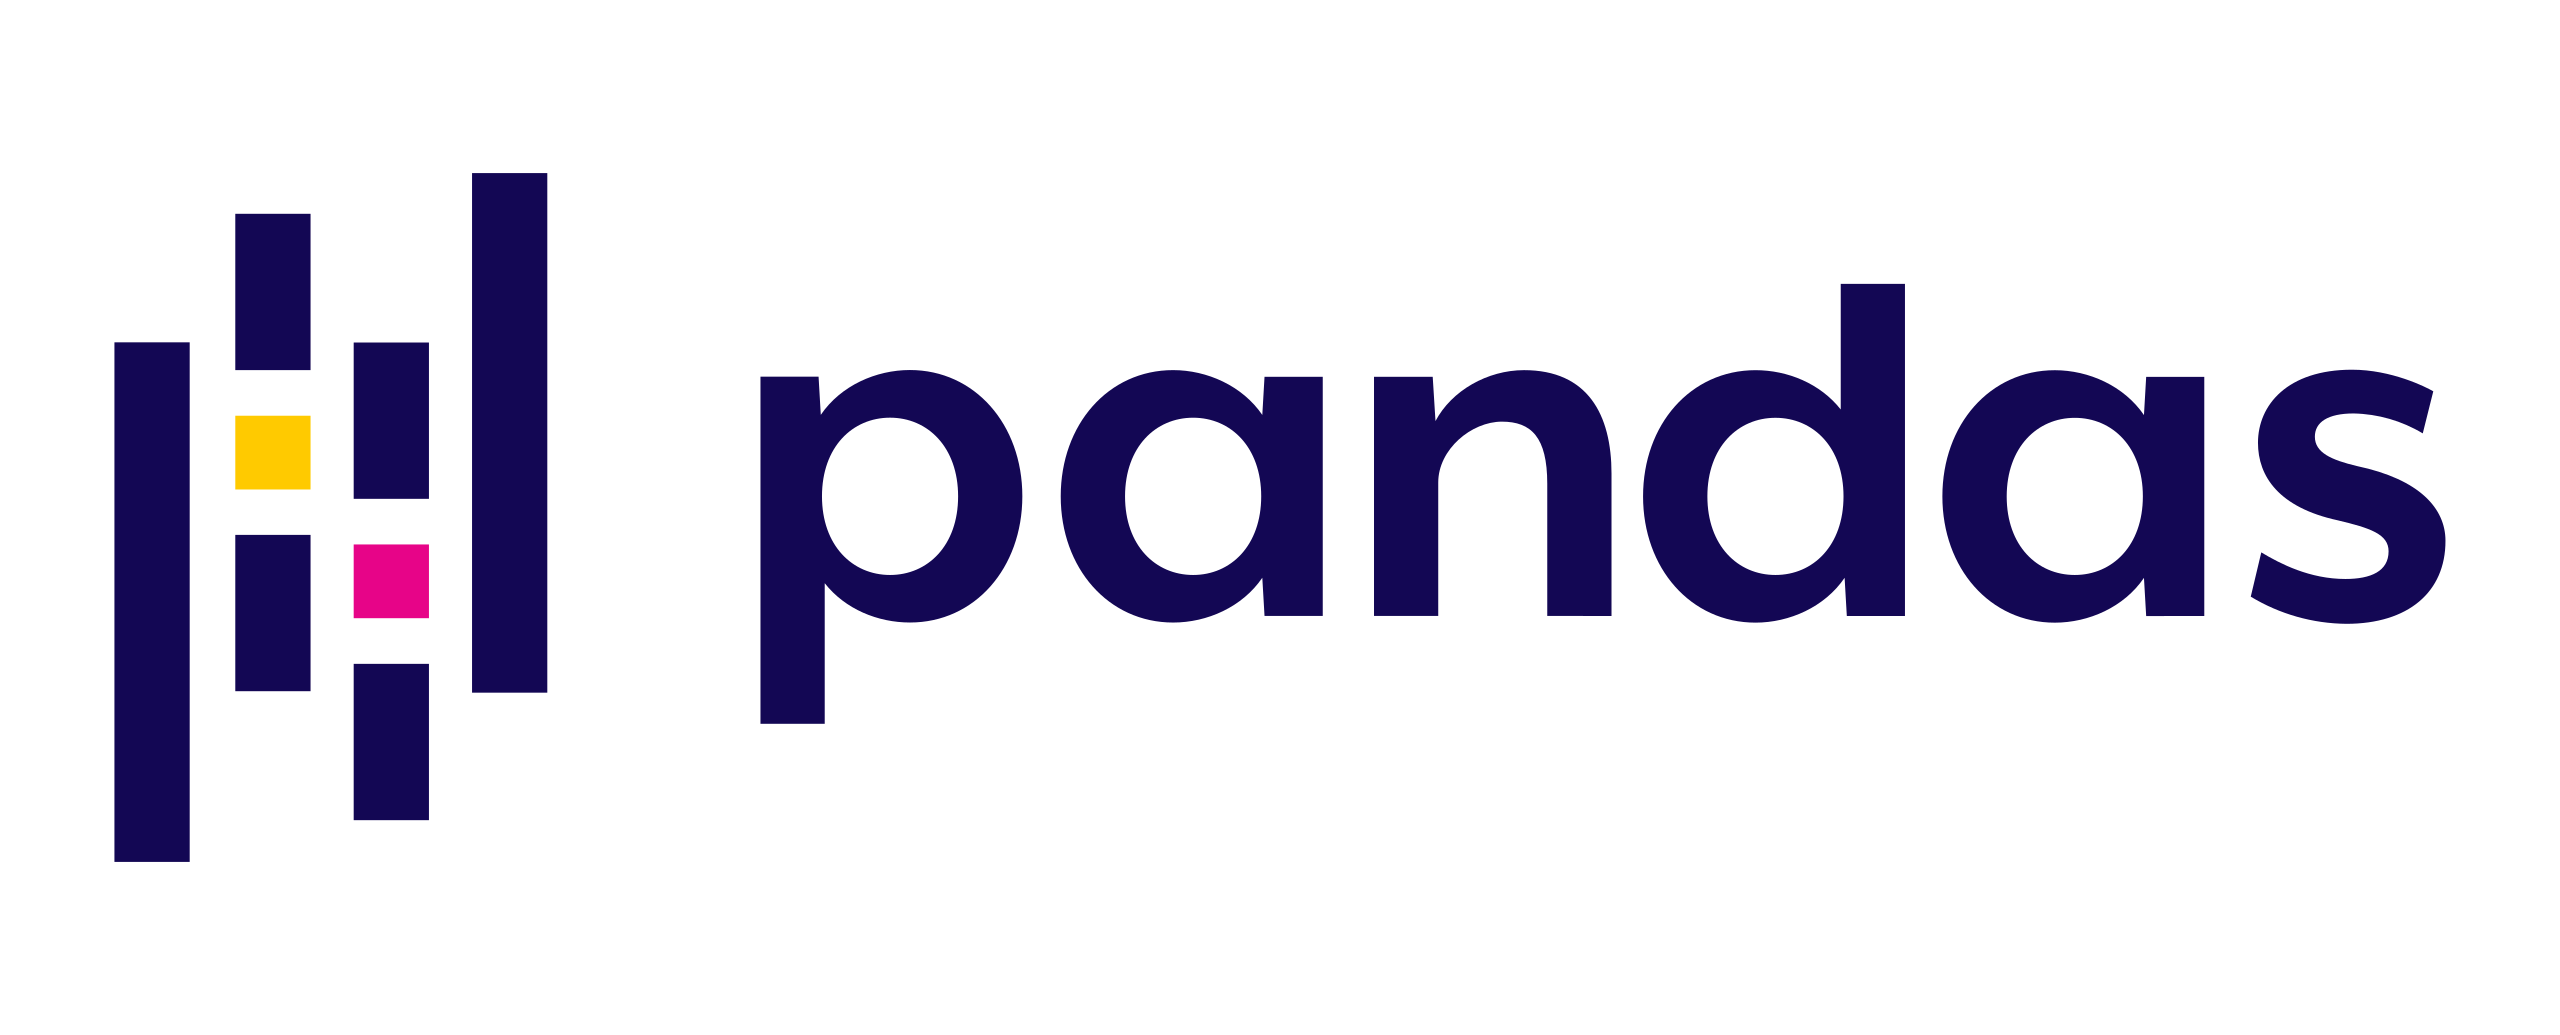

### Fazendo a leitura dos dados

Vamos analisar dados de emissões de gases de efeito estufa no território brasileiro e criar tabelas e visualizações para entender os dados e gerar insights a partir deles. Os dados foram extraídos do SEEG.

---
ℹ Fonte: SEEG - Sistema de Estimativa de Emissões e Remoções de Gases de Efeito Estufa, Observatório do Clima, acessado em http://seeg.eco.br:

- [Download da base de dados](http://seeg.eco.br/download)
---

Primeiramente, vamos importar a biblioteca [`pandas`](https://pandas.pydata.org/docs/index.html) e os dados que serão utilizados. Como os dados estão em um arquivo excel, vamos usar a função [`read_excel()`](https://pandas.pydata.org/docs/reference/api/pandas.read_excel.html).

In [1]:
import pandas as pd

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
#Importando os dados do OneDrive
emissoes = pd.read_excel('/content/drive/MyDrive/1-SEEG10_GERAL-BR_UF_2022.10.27-FINAL-SITE.xlsx', sheet_name = 'GEE Estados')


/usr/local/lib/python3.10/dist-packages/openpyxl/worksheet/_reader.py:329: UserWarning: Unknown extension is not supported and will be removed
  warn(msg)


In [4]:
#Exibindo linhas iniciais
emissoes.head()

,Nível 1 - Setor,Nível 2,Nível 3,Nível 4,Nível 5,Nível 6,Emissão / Remoção / Bunker,Gás,Estado,Atividade Econômica,...,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
0,Processos Industriais,Indústria Química,Produção de ABS,NaN,NaN,NaN,Emissão,COVNM (t),SP,OUTRA_IND,...,897.600,897.600,897.600,897.600,897.600,897.600,897.600,897.600,897.600,897.600
1,Processos Industriais,Indústria Química,Produção de Ácido Adípico,NaN,NaN,NaN,Emissão,N2O (t),SP,OUTRA_IND,...,130.000,130.000,130.000,130.000,130.000,130.000,130.000,130.000,130.000,130.000
2,Processos Industriais,Indústria Química,Produção de Ácido Adípico,NaN,NaN,NaN,Emissão,CO (t),SP,OUTRA_IND,...,1380.576,1380.576,1380.576,1380.576,1380.576,1380.576,1380.576,1380.576,1380.576,1380.576
3,Processos Industriais,Indústria Química,Produção de Ácido Adípico,NaN,NaN,NaN,Emissão,NOx (t),SP,OUTRA_IND,...,431.430,431.430,431.430,431.430,431.430,431.430,431.430,431.430,431.430,431.430
4,Processos Industriais,Indústria Química,Produção de Ácido Adípico,NaN,NaN,NaN,Emissão,CO2e (t) GWP-AR2,SP,OUTRA_IND,...,40300.000,40300.000,40300.000,40300.000,40300.000,40300.000,40300.000,40300.000,40300.000,40300.000


Vamos checar a estrutura do nosso DataFrame com o uso do método [`info()`](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.info.html?highlight=info#pandas.DataFrame.info), que retorna a quantidade de linhas e colunas, bem como a informação de quantidade de dados nulos e tipos de dados para cada uma das colunas.

In [5]:
#Verificando número de linhas e colunas, alem dos tipos de dados
emissoes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103312 entries, 0 to 103311
Data columns (total 63 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   Nível 1 - Setor             103312 non-null  object 
 1   Nível 2                     103312 non-null  object 
 2   Nível 3                     103253 non-null  object 
 3   Nível 4                     90920 non-null   object 
 4   Nível 5                     100788 non-null  object 
 5   Nível 6                     97691 non-null   object 
 6   Emissão / Remoção / Bunker  103312 non-null  object 
 7   Gás                         103312 non-null  object 
 8   Estado                      97374 non-null   object 
 9   Atividade Econômica         102076 non-null  object 
 10  Produto                     37413 non-null   object 
 11  1970                        103312 non-null  float64
 12  1971                        103312 non-null  float64
 13  1972          

### Ajustando a base de dados

Estamos interessados somente na emissão de gases gerados pelos estados que estejam no inventário nacional, portanto vamos identificar os tipos de dados únicos da coluna *Emissão / Remoção / Bunker*.

---
ℹ
- *Remoções são dados referentes à retirada dos gases estufa, que é o contrário da emissão*
- *NCI são dados não contemplados no inventário nacional*
- *Bunkers são emissões de transporte marítimo e aéreo internacional, portanto não são emissões diretas dos estados.*

*Informação disponível no site do SEEG: https://seeg.eco.br/entenda-as-estimativas*

---

In [6]:
#Iniciando a filtragem: Consultando os valores da coluna 'Emissão / Remoção / Bunker'
emissoes['Emissão / Remoção / Bunker'].unique()

array(['Emissão', 'Emissão NCI', 'Remoção NCI', 'Bunker', 'Remoção'],
      dtype=object)

Vamos checar primeiro os dados de remoção, para identificar se todos eles são de retirada de gases estufa.

In [8]:
#Trazendo os dados do DataSet onde os valores da coluna são iguais a 'Remoção NCI' OU 'Remoção NCI'. obs: essa linha de validação retorna um conjunto de dados booleanos onde somente o true é exibido
 #(emissoes['Emissão / Remoção / Bunker'] == 'Remoção NCI') | (emissoes['Emissão / Remoção / Bunker'] == 'Remoção')

In [9]:
#Trazendo os dados seguindo o filtro da coluna (valores iguais a 'Remoção' ou 'Remoção NCI')
emissoes[emissoes['Emissão / Remoção / Bunker'].isin(['Remoção', 'Remoção NCI'])]

,Nível 1 - Setor,Nível 2,Nível 3,Nível 4,Nível 5,Nível 6,Emissão / Remoção / Bunker,Gás,Estado,Atividade Econômica,...,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
23520,Agropecuária,Solos Manejados,Diretas,Variação dos Estoques de Carbono no Solo,Vegetal,Pastagem Bem Manejada,Remoção NCI,CO2 (t),RO,PEC,...,-1.434540e+07,-1.499358e+07,-1.543196e+07,-1.567070e+07,-1.630063e+07,-1.702215e+07,-1.740074e+07,-1.771914e+07,-1.767632e+07,-1.838895e+07
23521,Agropecuária,Solos Manejados,Diretas,Variação dos Estoques de Carbono no Solo,Vegetal,Pastagem Bem Manejada,Remoção NCI,CO2 (t),AC,PEC,...,-5.382949e+06,-5.524659e+06,-5.632429e+06,-5.765030e+06,-5.867354e+06,-5.942076e+06,-6.022000e+06,-6.002147e+06,-6.035591e+06,-6.459079e+06
23522,Agropecuária,Solos Manejados,Diretas,Variação dos Estoques de Carbono no Solo,Vegetal,Pastagem Bem Manejada,Remoção NCI,CO2 (t),AM,PEC,...,-3.450455e+06,-3.540294e+06,-3.545724e+06,-3.924546e+06,-4.626541e+06,-4.874199e+06,-4.849173e+06,-4.959540e+06,-5.106806e+06,-5.809814e+06
23523,Agropecuária,Solos Manejados,Diretas,Variação dos Estoques de Carbono no Solo,Vegetal,Pastagem Bem Manejada,Remoção NCI,CO2 (t),RR,PEC,...,-1.260166e+06,-1.261895e+06,-1.371664e+06,-1.501452e+06,-1.507705e+06,-1.509919e+06,-1.609826e+06,-1.616980e+06,-1.518397e+06,-1.926000e+06
23524,Agropecuária,Solos Manejados,Diretas,Variação dos Estoques de Carbono no Solo,Vegetal,Pastagem Bem Manejada,Remoção NCI,CO2 (t),PA,PEC,...,-3.429279e+07,-3.317185e+07,-3.281628e+07,-3.350720e+07,-3.557183e+07,-3.755308e+07,-4.134614e+07,-4.229403e+07,-4.275448e+07,-4.443440e+07
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
102751,Mudança de Uso da Terra e Floresta,Remoção por Vegetação Secundária,Pantanal,em Área Protegida,Vegetação nativa estável,Vegetação não florestal secundária -- Vegetaçã...,Remoção,CO2e (t) GWP-AR4,MS,AGROPEC,...,-7.513000e+04,-7.911900e+04,-8.695900e+04,-9.201400e+04,-9.149400e+04,-9.630200e+04,-9.202000e+04,-9.762300e+04,-1.015020e+05,-1.008910e+05
102752,Mudança de Uso da Terra e Floresta,Remoção por Vegetação Secundária,Pantanal,em Área Protegida,Vegetação nativa estável,Vegetação não florestal secundária -- Vegetaçã...,Remoção,CO2e (t) GWP-AR5,MT,AGROPEC,...,-9.523000e+03,-9.667000e+03,-1.000300e+04,-1.024200e+04,-1.027200e+04,-1.019100e+04,-1.046900e+04,-1.090400e+04,-1.104100e+04,-1.109500e+04
102753,Mudança de Uso da Terra e Floresta,Remoção por Vegetação Secundária,Pantanal,em Área Protegida,Vegetação nativa estável,Vegetação não florestal secundária -- Vegetaçã...,Remoção,CO2e (t) GWP-AR5,MS,AGROPEC,...,-7.513000e+04,-7.911900e+04,-8.695900e+04,-9.201400e+04,-9.149400e+04,-9.630200e+04,-9.202000e+04,-9.762300e+04,-1.015020e+05,-1.008910e+05
102754,Mudança de Uso da Terra e Floresta,Remoção por Vegetação Secundária,Pantanal,em Área Protegida,Vegetação nativa estável,Vegetação não florestal secundária -- Vegetaçã...,Remoção,CO2e (t) GWP-AR6,MT,AGROPEC,...,-9.523000e+03,-9.667000e+03,-1.000300e+04,-1.024200e+04,-1.027200e+04,-1.019100e+04,-1.046900e+04,-1.090400e+04,-1.104100e+04,-1.109500e+04


In [10]:
#Trazendo os valores númericos seguindo o filtro
emissoes.loc[emissoes['Emissão / Remoção / Bunker'].isin(['Remoção', 'Remoção NCI']), 1970:2021]

,1970,1971,1972,1973,1974,1975,1976,1977,1978,1979,...,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
23520,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-1.434540e+07,-1.499358e+07,-1.543196e+07,-1.567070e+07,-1.630063e+07,-1.702215e+07,-1.740074e+07,-1.771914e+07,-1.767632e+07,-1.838895e+07
23521,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-5.382949e+06,-5.524659e+06,-5.632429e+06,-5.765030e+06,-5.867354e+06,-5.942076e+06,-6.022000e+06,-6.002147e+06,-6.035591e+06,-6.459079e+06
23522,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-3.450455e+06,-3.540294e+06,-3.545724e+06,-3.924546e+06,-4.626541e+06,-4.874199e+06,-4.849173e+06,-4.959540e+06,-5.106806e+06,-5.809814e+06
23523,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-1.260166e+06,-1.261895e+06,-1.371664e+06,-1.501452e+06,-1.507705e+06,-1.509919e+06,-1.609826e+06,-1.616980e+06,-1.518397e+06,-1.926000e+06
23524,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-3.429279e+07,-3.317185e+07,-3.281628e+07,-3.350720e+07,-3.557183e+07,-3.755308e+07,-4.134614e+07,-4.229403e+07,-4.275448e+07,-4.443440e+07
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
102751,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-7.513000e+04,-7.911900e+04,-8.695900e+04,-9.201400e+04,-9.149400e+04,-9.630200e+04,-9.202000e+04,-9.762300e+04,-1.015020e+05,-1.008910e+05
102752,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-9.523000e+03,-9.667000e+03,-1.000300e+04,-1.024200e+04,-1.027200e+04,-1.019100e+04,-1.046900e+04,-1.090400e+04,-1.104100e+04,-1.109500e+04
102753,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-7.513000e+04,-7.911900e+04,-8.695900e+04,-9.201400e+04,-9.149400e+04,-9.630200e+04,-9.202000e+04,-9.762300e+04,-1.015020e+05,-1.008910e+05
102754,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-9.523000e+03,-9.667000e+03,-1.000300e+04,-1.024200e+04,-1.027200e+04,-1.019100e+04,-1.046900e+04,-1.090400e+04,-1.104100e+04,-1.109500e+04


Para identificar se todos os valores são negativos, vamos utilizar a função `max()` para checar se tem algum valor maior do que 0.

In [11]:
#Selecionando o valor máximo parra garantir que os valores dos anos são de fato valores negativos
emissoes.loc[emissoes['Emissão / Remoção / Bunker'].isin(['Remoção', 'Remoção NCI']), 1970:2021].max()

1970    0.0
1971    0.0
1972    0.0
1973    0.0
1974    0.0
1975    0.0
1976    0.0
1977    0.0
1978    0.0
1979    0.0
1980    0.0
1981    0.0
1982    0.0
1983    0.0
1984    0.0
1985    0.0
1986    0.0
1987    0.0
1988    0.0
1989    0.0
1990    0.0
1991    0.0
1992    0.0
1993    0.0
1994    0.0
1995    0.0
1996    0.0
1997    0.0
1998    0.0
1999    0.0
2000    0.0
2001    0.0
2002    0.0
2003    0.0
2004    0.0
2005    0.0
2006    0.0
2007    0.0
2008    0.0
2009    0.0
2010    0.0
2011    0.0
2012    0.0
2013    0.0
2014    0.0
2015    0.0
2016    0.0
2017    0.0
2018    0.0
2019    0.0
2020    0.0
2021    0.0
dtype: float64

Vamos também identificar se algum valor do tipo *Bunker* corresponde a alguma emissão feita por algum estado.

In [12]:
#Verificando os valores presentas na coluna 'Estado' onde o valor da coluna de emissõa correponde a Bunker
emissoes.loc[emissoes['Emissão / Remoção / Bunker'] == 'Bunker', 'Estado'].unique()

array([nan], dtype=object)

In [13]:
#Definindo o valor do data set como sendo o próprio data set porem somente onde o valor da coluna é igual a emissão
emissoes_filtrado = emissoes[emissoes['Emissão / Remoção / Bunker'] == 'Emissão']



In [14]:
#verificando novos valores da coluna após o filtro
emissoes_filtrado['Emissão / Remoção / Bunker'].unique()

array(['Emissão'], dtype=object)

Como não restou nenhum valor útil para análise na coluna de *Emissão / Remoção / Bunker*, vamos removê-la por completo da base de dados.

In [15]:
emissoes_filtrado.drop(columns = 'Emissão / Remoção / Bunker')

,Nível 1 - Setor,Nível 2,Nível 3,Nível 4,Nível 5,Nível 6,Gás,Estado,Atividade Econômica,Produto,...,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
0,Processos Industriais,Indústria Química,Produção de ABS,NaN,NaN,NaN,COVNM (t),SP,OUTRA_IND,NaN,...,897.600000,897.600000,897.600000,897.600000,897.600000,897.600000,897.600000,897.600,897.600,897.600
1,Processos Industriais,Indústria Química,Produção de Ácido Adípico,NaN,NaN,NaN,N2O (t),SP,OUTRA_IND,NaN,...,130.000000,130.000000,130.000000,130.000000,130.000000,130.000000,130.000000,130.000,130.000,130.000
2,Processos Industriais,Indústria Química,Produção de Ácido Adípico,NaN,NaN,NaN,CO (t),SP,OUTRA_IND,NaN,...,1380.576000,1380.576000,1380.576000,1380.576000,1380.576000,1380.576000,1380.576000,1380.576,1380.576,1380.576
3,Processos Industriais,Indústria Química,Produção de Ácido Adípico,NaN,NaN,NaN,NOx (t),SP,OUTRA_IND,NaN,...,431.430000,431.430000,431.430000,431.430000,431.430000,431.430000,431.430000,431.430,431.430,431.430
4,Processos Industriais,Indústria Química,Produção de Ácido Adípico,NaN,NaN,NaN,CO2e (t) GWP-AR2,SP,OUTRA_IND,NaN,...,40300.000000,40300.000000,40300.000000,40300.000000,40300.000000,40300.000000,40300.000000,40300.000,40300.000,40300.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
103241,Mudança de Uso da Terra e Floresta,Resíduos Florestais,Pantanal,NaN,Desmatamento,NaN,CO2e (t) GWP-AR5,MS,AGROPEC,NaN,...,436935.000000,500067.000000,440030.000000,365272.000000,438422.000000,391113.000000,411738.000000,437039.000,871393.000,1004191.000
103242,Mudança de Uso da Terra e Floresta,Resíduos Florestais,Pantanal,NaN,Desmatamento,NaN,CO2e (t) GWP-AR6,MT,AGROPEC,NaN,...,126806.000000,127558.000000,193758.000000,164585.000000,234509.000000,190412.000000,162919.000000,186091.000,368149.000,443120.000
103243,Mudança de Uso da Terra e Floresta,Resíduos Florestais,Pantanal,NaN,Desmatamento,NaN,CO2e (t) GWP-AR6,MS,AGROPEC,NaN,...,439524.000000,502908.000000,442493.000000,367116.000000,440798.000000,393101.000000,413749.000000,439526.000,876637.000,1009968.000
103244,Mudança de Uso da Terra e Floresta,Resíduos Florestais,Pantanal,NaN,Desmatamento,NaN,N2O (t),MT,AGROPEC,NaN,...,108.441090,109.811199,166.680103,141.442361,201.556097,162.932751,137.219684,158.000,314.000,479.000


#Desafio


In [16]:
#Selecionando valores unicos
emissoes_filtrado['Nível 1 - Setor'].unique()


array(['Processos Industriais', 'Agropecuária', 'Energia', 'Resíduos ',
       'Mudança de Uso da Terra e Floresta'], dtype=object)

In [17]:
emissoes_filtrado['Estado'].unique()

array(['SP', 'BA', 'RJ', 'MG', 'SE', 'PR', nan, 'RO', 'AM', 'PA', 'TO',
       'MA', 'PI', 'CE', 'RN', 'PB', 'PE', 'AL', 'MT', 'MS', 'GO', 'DF',
       'ES', 'SC', 'RS', 'AC', 'AP', 'RR'], dtype=object)

In [18]:
#Filtrando colunas: Região SUL
emissoes_filtrado[emissoes_filtrado['Estado'].isin(['RS','SC'])]

,Nível 1 - Setor,Nível 2,Nível 3,Nível 4,Nível 5,Nível 6,Emissão / Remoção / Bunker,Gás,Estado,Atividade Econômica,...,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
111,Processos Industriais,Produtos Minerais,Produção de Cimento,NaN,NaN,NaN,Emissão,CO2 (t),SC,CIM,...,7.126368e+05,6.421719e+05,8.163383e+05,6.769844e+05,527268.576533,5.143665e+05,5.130451e+05,5.451073e+05,6.144431e+05,7.179804e+05
112,Processos Industriais,Produtos Minerais,Produção de Cimento,NaN,NaN,NaN,Emissão,CO2 (t),RS,CIM,...,8.012213e+05,8.021637e+05,7.466539e+05,6.627806e+05,546675.329448,5.079599e+05,4.881930e+05,4.921312e+05,5.410035e+05,6.037168e+05
136,Processos Industriais,Produtos Minerais,Produção de Cimento,NaN,NaN,NaN,Emissão,CO2e (t) GWP-AR2,SC,CIM,...,7.126368e+05,6.421719e+05,8.163383e+05,6.769844e+05,527268.576533,5.143665e+05,5.130451e+05,5.451073e+05,6.144431e+05,7.179804e+05
137,Processos Industriais,Produtos Minerais,Produção de Cimento,NaN,NaN,NaN,Emissão,CO2e (t) GWP-AR2,RS,CIM,...,8.012213e+05,8.021637e+05,7.466539e+05,6.627806e+05,546675.329448,5.079599e+05,4.881930e+05,4.921312e+05,5.410035e+05,6.037168e+05
161,Processos Industriais,Produtos Minerais,Produção de Cimento,NaN,NaN,NaN,Emissão,CO2e (t) GTP-AR2,SC,CIM,...,7.126368e+05,6.421719e+05,8.163383e+05,6.769844e+05,527268.576533,5.143665e+05,5.130451e+05,5.451073e+05,6.144431e+05,7.179804e+05
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
103221,Mudança de Uso da Terra e Floresta,Resíduos Florestais,Pampa,NaN,Desmatamento,NaN,Emissão,CO2e (t) GWP-AR2,RS,AGROPEC,...,1.108518e+06,1.479183e+06,9.718840e+05,9.948190e+05,769868.000000,9.057280e+05,9.238730e+05,1.046432e+06,1.439095e+06,1.432812e+06
103222,Mudança de Uso da Terra e Floresta,Resíduos Florestais,Pampa,NaN,Desmatamento,NaN,Emissão,CO2e (t) GWP-AR4,RS,AGROPEC,...,1.196999e+06,1.599471e+06,1.045298e+06,1.070678e+06,830805.000000,9.748940e+05,9.924510e+05,1.124747e+06,1.543126e+06,1.541087e+06
103223,Mudança de Uso da Terra e Floresta,Resíduos Florestais,Pampa,NaN,Desmatamento,NaN,Emissão,CO2e (t) GWP-AR5,RS,AGROPEC,...,1.221927e+06,1.635136e+06,1.062603e+06,1.089187e+06,847534.000000,9.918540e+05,1.007627e+06,1.142614e+06,1.563684e+06,1.566694e+06
103224,Mudança de Uso da Terra e Floresta,Resíduos Florestais,Pampa,NaN,Desmatamento,NaN,Emissão,CO2e (t) GWP-AR6,RS,AGROPEC,...,1.232994e+06,1.649637e+06,1.072887e+06,1.099601e+06,855306.000000,1.001321e+06,1.017557e+06,1.153771e+06,1.579514e+06,1.581831e+06


In [19]:
#Filtrando colunas: Amazonas e Mudança de Uso da Terra e Floresta
emissoes_filtrado[(emissoes_filtrado['Nível 1 - Setor'] == 'Mudança de Uso da Terra e Floresta') & (emissoes_filtrado['Estado'] == 'AM') ]

#Tentativa Falha: Faltou acento no nivel >:(

,Nível 1 - Setor,Nível 2,Nível 3,Nível 4,Nível 5,Nível 6,Emissão / Remoção / Bunker,Gás,Estado,Atividade Econômica,...,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
81262,Mudança de Uso da Terra e Floresta,Alterações de Uso da Terra,Amazônia,fora de Área Protegida,Desmatamento,Floresta primária -- Área sem vegetação,Emissão,CO2 (t),AM,AGROPEC,...,8.511800e+04,9.763700e+04,8.761900e+04,1.218150e+05,1.137590e+05,5.299800e+04,6.117000e+04,48264.0,14381.0,31867.0
81271,Mudança de Uso da Terra e Floresta,Alterações de Uso da Terra,Amazônia,fora de Área Protegida,Desmatamento,Floresta primária -- Área sem vegetação,Emissão,CO2e (t) GTP-AR2,AM,AGROPEC,...,8.511800e+04,9.763700e+04,8.761900e+04,1.218150e+05,1.137590e+05,5.299800e+04,6.117000e+04,48264.0,14381.0,31867.0
81280,Mudança de Uso da Terra e Floresta,Alterações de Uso da Terra,Amazônia,fora de Área Protegida,Desmatamento,Floresta primária -- Área sem vegetação,Emissão,CO2e (t) GTP-AR4,AM,AGROPEC,...,8.511800e+04,9.763700e+04,8.761900e+04,1.218150e+05,1.137590e+05,5.299800e+04,6.117000e+04,48264.0,14381.0,31867.0
81289,Mudança de Uso da Terra e Floresta,Alterações de Uso da Terra,Amazônia,fora de Área Protegida,Desmatamento,Floresta primária -- Área sem vegetação,Emissão,CO2e (t) GTP-AR5,AM,AGROPEC,...,8.511800e+04,9.763700e+04,8.761900e+04,1.218150e+05,1.137590e+05,5.299800e+04,6.117000e+04,48264.0,14381.0,31867.0
81298,Mudança de Uso da Terra e Floresta,Alterações de Uso da Terra,Amazônia,fora de Área Protegida,Desmatamento,Floresta primária -- Área sem vegetação,Emissão,CO2e (t) GTP-AR6,AM,AGROPEC,...,8.511800e+04,9.763700e+04,8.761900e+04,1.218150e+05,1.137590e+05,5.299800e+04,6.117000e+04,48264.0,14381.0,31867.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
102803,Mudança de Uso da Terra e Floresta,Resíduos Florestais,Amazônia,NaN,Desmatamento,NaN,Emissão,CO2e (t) GWP-AR2,AM,AGROPEC,...,2.239997e+06,3.186571e+06,2.973253e+06,4.796274e+06,7.396711e+06,4.362453e+06,4.434835e+06,7074966.0,8746520.0,8429758.0
102812,Mudança de Uso da Terra e Floresta,Resíduos Florestais,Amazônia,NaN,Desmatamento,NaN,Emissão,CO2e (t) GWP-AR4,AM,AGROPEC,...,2.505953e+06,3.565317e+06,3.330733e+06,5.368844e+06,8.276064e+06,4.888099e+06,4.967871e+06,7929733.0,9799770.0,9408067.0
102821,Mudança de Uso da Terra e Floresta,Resíduos Florestais,Amazônia,NaN,Desmatamento,NaN,Emissão,CO2e (t) GWP-AR5,AM,AGROPEC,...,2.651128e+06,3.772286e+06,3.528292e+06,5.683071e+06,8.756712e+06,5.179207e+06,5.262358e+06,8404321.0,10382705.0,9929881.0
102830,Mudança de Uso da Terra e Floresta,Resíduos Florestais,Amazônia,NaN,Desmatamento,NaN,Emissão,CO2e (t) GWP-AR6,AM,AGROPEC,...,2.661898e+06,3.787545e+06,3.541992e+06,5.705721e+06,8.792123e+06,5.199159e+06,5.282817e+06,8436366.0,10422789.0,9973416.0


In [20]:
#Filtrando colunas: Amazonas e Mudança de Uso da Terra e Floresta
emissoes_desafio_contorno = emissoes_filtrado[emissoes['Estado'] == 'AM']

<ipython-input-20-461bde4144fa>:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  emissoes_desafio_contorno = emissoes_filtrado[emissoes['Estado'] == 'AM']


In [21]:
emissoes_desafio_contorno[emissoes_desafio_contorno['Nível 1 - Setor'] == 'Mudança de Uso da Terra e Floresta']

,Nível 1 - Setor,Nível 2,Nível 3,Nível 4,Nível 5,Nível 6,Emissão / Remoção / Bunker,Gás,Estado,Atividade Econômica,...,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
81262,Mudança de Uso da Terra e Floresta,Alterações de Uso da Terra,Amazônia,fora de Área Protegida,Desmatamento,Floresta primária -- Área sem vegetação,Emissão,CO2 (t),AM,AGROPEC,...,8.511800e+04,9.763700e+04,8.761900e+04,1.218150e+05,1.137590e+05,5.299800e+04,6.117000e+04,48264.0,14381.0,31867.0
81271,Mudança de Uso da Terra e Floresta,Alterações de Uso da Terra,Amazônia,fora de Área Protegida,Desmatamento,Floresta primária -- Área sem vegetação,Emissão,CO2e (t) GTP-AR2,AM,AGROPEC,...,8.511800e+04,9.763700e+04,8.761900e+04,1.218150e+05,1.137590e+05,5.299800e+04,6.117000e+04,48264.0,14381.0,31867.0
81280,Mudança de Uso da Terra e Floresta,Alterações de Uso da Terra,Amazônia,fora de Área Protegida,Desmatamento,Floresta primária -- Área sem vegetação,Emissão,CO2e (t) GTP-AR4,AM,AGROPEC,...,8.511800e+04,9.763700e+04,8.761900e+04,1.218150e+05,1.137590e+05,5.299800e+04,6.117000e+04,48264.0,14381.0,31867.0
81289,Mudança de Uso da Terra e Floresta,Alterações de Uso da Terra,Amazônia,fora de Área Protegida,Desmatamento,Floresta primária -- Área sem vegetação,Emissão,CO2e (t) GTP-AR5,AM,AGROPEC,...,8.511800e+04,9.763700e+04,8.761900e+04,1.218150e+05,1.137590e+05,5.299800e+04,6.117000e+04,48264.0,14381.0,31867.0
81298,Mudança de Uso da Terra e Floresta,Alterações de Uso da Terra,Amazônia,fora de Área Protegida,Desmatamento,Floresta primária -- Área sem vegetação,Emissão,CO2e (t) GTP-AR6,AM,AGROPEC,...,8.511800e+04,9.763700e+04,8.761900e+04,1.218150e+05,1.137590e+05,5.299800e+04,6.117000e+04,48264.0,14381.0,31867.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
102803,Mudança de Uso da Terra e Floresta,Resíduos Florestais,Amazônia,NaN,Desmatamento,NaN,Emissão,CO2e (t) GWP-AR2,AM,AGROPEC,...,2.239997e+06,3.186571e+06,2.973253e+06,4.796274e+06,7.396711e+06,4.362453e+06,4.434835e+06,7074966.0,8746520.0,8429758.0
102812,Mudança de Uso da Terra e Floresta,Resíduos Florestais,Amazônia,NaN,Desmatamento,NaN,Emissão,CO2e (t) GWP-AR4,AM,AGROPEC,...,2.505953e+06,3.565317e+06,3.330733e+06,5.368844e+06,8.276064e+06,4.888099e+06,4.967871e+06,7929733.0,9799770.0,9408067.0
102821,Mudança de Uso da Terra e Floresta,Resíduos Florestais,Amazônia,NaN,Desmatamento,NaN,Emissão,CO2e (t) GWP-AR5,AM,AGROPEC,...,2.651128e+06,3.772286e+06,3.528292e+06,5.683071e+06,8.756712e+06,5.179207e+06,5.262358e+06,8404321.0,10382705.0,9929881.0
102830,Mudança de Uso da Terra e Floresta,Resíduos Florestais,Amazônia,NaN,Desmatamento,NaN,Emissão,CO2e (t) GWP-AR6,AM,AGROPEC,...,2.661898e+06,3.787545e+06,3.541992e+06,5.705721e+06,8.792123e+06,5.199159e+06,5.282817e+06,8436366.0,10422789.0,9973416.0


In [22]:
emissoes_desafio_contorno.loc[emissoes_desafio_contorno['Nível 1 - Setor'] == 'Mudança de Uso da Terra e Floresta',2021].max()

78827442.0

In [23]:
#Resolução do duplo filtro do curso
emissoes_filtrado[(emissoes_filtrado['Nível 1 - Setor'] == 'Mudança de Uso da Terra e Floresta') & (emissoes_filtrado['Estado'] == 'AM')]

,Nível 1 - Setor,Nível 2,Nível 3,Nível 4,Nível 5,Nível 6,Emissão / Remoção / Bunker,Gás,Estado,Atividade Econômica,...,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
81262,Mudança de Uso da Terra e Floresta,Alterações de Uso da Terra,Amazônia,fora de Área Protegida,Desmatamento,Floresta primária -- Área sem vegetação,Emissão,CO2 (t),AM,AGROPEC,...,8.511800e+04,9.763700e+04,8.761900e+04,1.218150e+05,1.137590e+05,5.299800e+04,6.117000e+04,48264.0,14381.0,31867.0
81271,Mudança de Uso da Terra e Floresta,Alterações de Uso da Terra,Amazônia,fora de Área Protegida,Desmatamento,Floresta primária -- Área sem vegetação,Emissão,CO2e (t) GTP-AR2,AM,AGROPEC,...,8.511800e+04,9.763700e+04,8.761900e+04,1.218150e+05,1.137590e+05,5.299800e+04,6.117000e+04,48264.0,14381.0,31867.0
81280,Mudança de Uso da Terra e Floresta,Alterações de Uso da Terra,Amazônia,fora de Área Protegida,Desmatamento,Floresta primária -- Área sem vegetação,Emissão,CO2e (t) GTP-AR4,AM,AGROPEC,...,8.511800e+04,9.763700e+04,8.761900e+04,1.218150e+05,1.137590e+05,5.299800e+04,6.117000e+04,48264.0,14381.0,31867.0
81289,Mudança de Uso da Terra e Floresta,Alterações de Uso da Terra,Amazônia,fora de Área Protegida,Desmatamento,Floresta primária -- Área sem vegetação,Emissão,CO2e (t) GTP-AR5,AM,AGROPEC,...,8.511800e+04,9.763700e+04,8.761900e+04,1.218150e+05,1.137590e+05,5.299800e+04,6.117000e+04,48264.0,14381.0,31867.0
81298,Mudança de Uso da Terra e Floresta,Alterações de Uso da Terra,Amazônia,fora de Área Protegida,Desmatamento,Floresta primária -- Área sem vegetação,Emissão,CO2e (t) GTP-AR6,AM,AGROPEC,...,8.511800e+04,9.763700e+04,8.761900e+04,1.218150e+05,1.137590e+05,5.299800e+04,6.117000e+04,48264.0,14381.0,31867.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
102803,Mudança de Uso da Terra e Floresta,Resíduos Florestais,Amazônia,NaN,Desmatamento,NaN,Emissão,CO2e (t) GWP-AR2,AM,AGROPEC,...,2.239997e+06,3.186571e+06,2.973253e+06,4.796274e+06,7.396711e+06,4.362453e+06,4.434835e+06,7074966.0,8746520.0,8429758.0
102812,Mudança de Uso da Terra e Floresta,Resíduos Florestais,Amazônia,NaN,Desmatamento,NaN,Emissão,CO2e (t) GWP-AR4,AM,AGROPEC,...,2.505953e+06,3.565317e+06,3.330733e+06,5.368844e+06,8.276064e+06,4.888099e+06,4.967871e+06,7929733.0,9799770.0,9408067.0
102821,Mudança de Uso da Terra e Floresta,Resíduos Florestais,Amazônia,NaN,Desmatamento,NaN,Emissão,CO2e (t) GWP-AR5,AM,AGROPEC,...,2.651128e+06,3.772286e+06,3.528292e+06,5.683071e+06,8.756712e+06,5.179207e+06,5.262358e+06,8404321.0,10382705.0,9929881.0
102830,Mudança de Uso da Terra e Floresta,Resíduos Florestais,Amazônia,NaN,Desmatamento,NaN,Emissão,CO2e (t) GWP-AR6,AM,AGROPEC,...,2.661898e+06,3.787545e+06,3.541992e+06,5.705721e+06,8.792123e+06,5.199159e+06,5.282817e+06,8436366.0,10422789.0,9973416.0


### Modificando o formato do DataFrame

Para realizar as agregações nos dados de emissão, é necessário que a base de dados esteja em um formato adequado, com os valores de emissão todos em uma mesma coluna. Para isso, devemos modificar o formato da base de dados de forma que as colunas referentes a cada ano se tornem uma só coluna.

In [24]:
#Reduzir o numero de colunas tranformando um registro por ano ao inves de um registro com todos os anos
#Filtrando as colunas que não0 devem ser alteradas
emissoes_filtrado.loc[:,'Nível 1 - Setor':'Produto'].columns

Index(['Nível 1 - Setor', 'Nível 2', 'Nível 3', 'Nível 4', 'Nível 5',
       'Nível 6', 'Emissão / Remoção / Bunker', 'Gás', 'Estado',
       'Atividade Econômica', 'Produto'],
      dtype='object')

In [25]:
#Atribuindo a uma variavel em fora de lista
colunas_info = list(emissoes_filtrado.loc[:,'Nível 1 - Setor':'Produto'].columns)
colunas_info

['Nível 1 - Setor',
 'Nível 2',
 'Nível 3',
 'Nível 4',
 'Nível 5',
 'Nível 6',
 'Emissão / Remoção / Bunker',
 'Gás',
 'Estado',
 'Atividade Econômica',
 'Produto']

In [26]:
#filtrando as colunas que serão tranformadas em linhas
emissoes_filtrado.loc[:,1970:2021].columns

Index([1970, 1971, 1972, 1973, 1974, 1975, 1976, 1977, 1978, 1979, 1980, 1981,
       1982, 1983, 1984, 1985, 1986, 1987, 1988, 1989, 1990, 1991, 1992, 1993,
       1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005,
       2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017,
       2018, 2019, 2020, 2021],
      dtype='object')

In [27]:
colunas_emissao = list(emissoes_filtrado.loc[:,1970:2021].columns)
colunas_emissao

[1970,
 1971,
 1972,
 1973,
 1974,
 1975,
 1976,
 1977,
 1978,
 1979,
 1980,
 1981,
 1982,
 1983,
 1984,
 1985,
 1986,
 1987,
 1988,
 1989,
 1990,
 1991,
 1992,
 1993,
 1994,
 1995,
 1996,
 1997,
 1998,
 1999,
 2000,
 2001,
 2002,
 2003,
 2004,
 2005,
 2006,
 2007,
 2008,
 2009,
 2010,
 2011,
 2012,
 2013,
 2014,
 2015,
 2016,
 2017,
 2018,
 2019,
 2020,
 2021]

Para realizar a transformação do DataFrame, utilizamos o método [`melt()`](https://pandas.pydata.org/docs/reference/api/pandas.melt.html). Esse método tem o intuito de transformar um DataFrame de um formato amplo (*wide*) para o formato longo (*long*).

In [28]:
emissoes_filtrado.melt(id_vars = colunas_info,value_vars = colunas_emissao, var_name = 'Ano', value_name = 'Emissão')

,Nível 1 - Setor,Nível 2,Nível 3,Nível 4,Nível 5,Nível 6,Emissão / Remoção / Bunker,Gás,Estado,Atividade Econômica,Produto,Ano,Emissão
0,Processos Industriais,Indústria Química,Produção de ABS,NaN,NaN,NaN,Emissão,COVNM (t),SP,OUTRA_IND,NaN,1970,0.0
1,Processos Industriais,Indústria Química,Produção de Ácido Adípico,NaN,NaN,NaN,Emissão,N2O (t),SP,OUTRA_IND,NaN,1970,6210.0
2,Processos Industriais,Indústria Química,Produção de Ácido Adípico,NaN,NaN,NaN,Emissão,CO (t),SP,OUTRA_IND,NaN,1970,368.0
3,Processos Industriais,Indústria Química,Produção de Ácido Adípico,NaN,NaN,NaN,Emissão,NOx (t),SP,OUTRA_IND,NaN,1970,115.0
4,Processos Industriais,Indústria Química,Produção de Ácido Adípico,NaN,NaN,NaN,Emissão,CO2e (t) GWP-AR2,SP,OUTRA_IND,NaN,1970,1925100.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4926891,Mudança de Uso da Terra e Floresta,Resíduos Florestais,Pantanal,NaN,Desmatamento,NaN,Emissão,CO2e (t) GWP-AR5,MS,AGROPEC,NaN,2021,1004191.0
4926892,Mudança de Uso da Terra e Floresta,Resíduos Florestais,Pantanal,NaN,Desmatamento,NaN,Emissão,CO2e (t) GWP-AR6,MT,AGROPEC,NaN,2021,443120.0
4926893,Mudança de Uso da Terra e Floresta,Resíduos Florestais,Pantanal,NaN,Desmatamento,NaN,Emissão,CO2e (t) GWP-AR6,MS,AGROPEC,NaN,2021,1009968.0
4926894,Mudança de Uso da Terra e Floresta,Resíduos Florestais,Pantanal,NaN,Desmatamento,NaN,Emissão,N2O (t),MT,AGROPEC,NaN,2021,479.0


In [29]:
emissoes_p_ano = emissoes_filtrado.melt(id_vars = colunas_info,value_vars = colunas_emissao, var_name = 'Ano', value_name = 'Emissão')

### Análise dos gases

Vamos fazer uma análise agora da quantidade de emissão **total** por tipo de gás. Para isso, vamos realizar um agrupamento dos dados com a função [`groupby()`](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.groupby.html).


In [30]:
#Agrupando emissoes por tipo de gás. Iniciando o agrupamento pela coluna 'Gás'
emissoes_p_ano.groupby('Gás')

Podemos checar quais dados foram agrupados em cada grupo com uso do atributo [`groups`](https://pandas.pydata.org/docs/reference/api/pandas.core.groupby.GroupBy.groups.html) e realizar seleções de grupos específicos com o método [`get_group()`](https://pandas.pydata.org/docs/reference/api/pandas.core.groupby.GroupBy.get_group.html).

In [31]:
#Trazendo linhas seprados pelos grupos
emissoes_p_ano.groupby('Gás').groups

{'C2F6 (t)': [410, 411, 412, 425, 426, 427, 95158, 95159, 95160, 95173, 95174, 95175, 189906, 189907, 189908, 189921, 189922, 189923, 284654, 284655, 284656, 284669, 284670, 284671, 379402, 379403, 379404, 379417, 379418, 379419, 474150, 474151, 474152, 474165, 474166, 474167, 568898, 568899, 568900, 568913, 568914, 568915, 663646, 663647, 663648, 663661, 663662, 663663, 758394, 758395, 758396, 758409, 758410, 758411, 853142, 853143, 853144, 853157, 853158, 853159, 947890, 947891, 947892, 947905, 947906, 947907, 1042638, 1042639, 1042640, 1042653, 1042654, 1042655, 1137386, 1137387, 1137388, 1137401, 1137402, 1137403, 1232134, 1232135, 1232136, 1232149, 1232150, 1232151, 1326882, 1326883, 1326884, 1326897, 1326898, 1326899, 1421630, 1421631, 1421632, 1421645, 1421646, 1421647, 1516378, 1516379, 1516380, 1516393, ...], 'CF4 (t)': [407, 408, 409, 422, 423, 424, 95155, 95156, 95157, 95170, 95171, 95172, 189903, 189904, 189905, 189918, 189919, 189920, 284651, 284652, 284653, 284666, 284667

In [32]:
#Selecionando grupo especifico
emissoes_p_ano.groupby('Gás').get_group('CO2 (t)')

,Nível 1 - Setor,Nível 2,Nível 3,Nível 4,Nível 5,Nível 6,Emissão / Remoção / Bunker,Gás,Estado,Atividade Econômica,Produto,Ano,Emissão
18,Processos Industriais,Indústria Química,Produção de Acrilonitrila,NaN,NaN,NaN,Emissão,CO2 (t),BA,OUTRA_IND,NaN,1970,0.000000
23,Processos Industriais,Indústria Química,Produção de Amônia,NaN,NaN,NaN,Emissão,CO2 (t),RJ,OUTRA_IND,NaN,1970,0.000000
26,Processos Industriais,Indústria Química,Produção de Amônia,NaN,NaN,NaN,Emissão,CO2 (t),MG,OUTRA_IND,NaN,1970,0.000000
29,Processos Industriais,Indústria Química,Produção de Amônia,NaN,NaN,NaN,Emissão,CO2 (t),BA,OUTRA_IND,NaN,1970,10742.465792
32,Processos Industriais,Indústria Química,Produção de Amônia,NaN,NaN,NaN,Emissão,CO2 (t),SE,OUTRA_IND,NaN,1970,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4926255,Mudança de Uso da Terra e Floresta,Alterações de Uso da Terra,Pantanal,em Área Protegida,Outras Mudanças de uso da terra,Uso agropecuário -- Uso agropecuário,Emissão,CO2 (t),MS,AGROPEC,NaN,2021,0.000000
4926272,Mudança de Uso da Terra e Floresta,Alterações de Uso da Terra,Pantanal,em Área Protegida,Regeneração,Uso agropecuário -- Floresta secundária,Emissão,CO2 (t),MT,AGROPEC,NaN,2021,374.000000
4926273,Mudança de Uso da Terra e Floresta,Alterações de Uso da Terra,Pantanal,em Área Protegida,Regeneração,Uso agropecuário -- Floresta secundária,Emissão,CO2 (t),MS,AGROPEC,NaN,2021,8613.000000
4926290,Mudança de Uso da Terra e Floresta,Alterações de Uso da Terra,Pantanal,em Área Protegida,Regeneração,Uso agropecuário -- Vegetação não florestal se...,Emissão,CO2 (t),MT,AGROPEC,NaN,2021,934.000000


Os métodos de agregação possíveis com a utilização do `groupby()`são os seguintes:
- `count()` para realizar contagem
- `sum()` para soma
- `mean()` para a média
- `median()` para a mediana
- `min()` para o valor mínimo
- `max()` para o valor máximo
- `std()` para o desvio-padrão
- `var()` para a variância

In [33]:
#Trazendo informações por grupo
#Trazendo a soma de todos campos numericos
#emissoes_p_ano.groupby('Gás').sum(numeric_only = True)

#Especificando a coluna
emissoes_p_ano.groupby('Gás')[['Emissão']].sum()

,Emissão
Gás,
C2F6 (t),5.765018e+02
CF4 (t),7.135481e+03
CH4 (t),7.949268e+08
CO (t),5.111531e+08
CO2 (t),5.324636e+10
CO2e (t) GTP-AR2,6.344612e+10
CO2e (t) GTP-AR4,6.344612e+10
CO2e (t) GTP-AR5,6.182200e+10
CO2e (t) GTP-AR6,6.247859e+10


In [34]:
emissoes_por_gas = emissoes_p_ano.groupby('Gás')[['Emissão']].sum()
emissoes_por_gas

,Emissão
Gás,
C2F6 (t),5.765018e+02
CF4 (t),7.135481e+03
CH4 (t),7.949268e+08
CO (t),5.111531e+08
CO2 (t),5.324636e+10
CO2e (t) GTP-AR2,6.344612e+10
CO2e (t) GTP-AR4,6.344612e+10
CO2e (t) GTP-AR5,6.182200e+10
CO2e (t) GTP-AR6,6.247859e+10


In [35]:
#Ordenando
emissoes_por_gas = emissoes_por_gas.sort_values('Emissão',ascending = False)

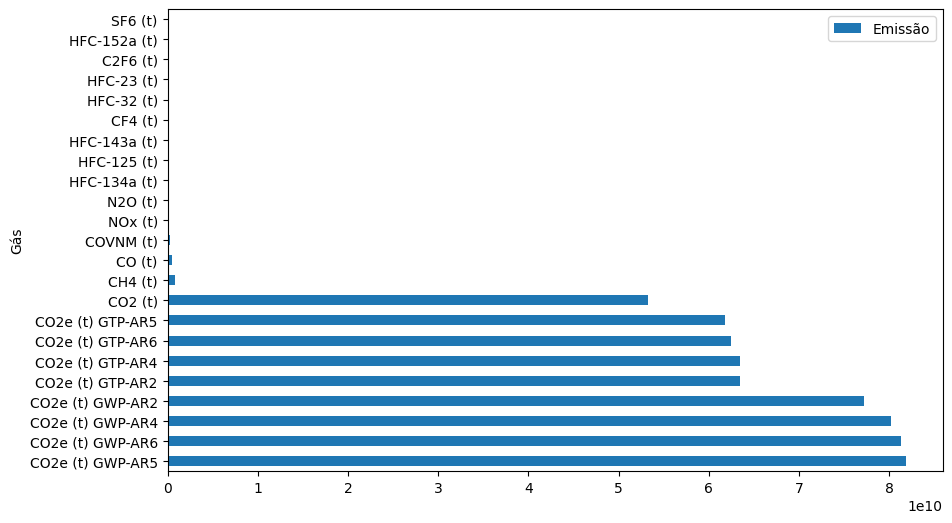

In [36]:
#Plotando para dimensionar diferença entre CO2 para os outros gases
emissoes_por_gas.plot(kind = 'barh', figsize = (10,6));

In [37]:
emissoes_por_gas.iloc[0:9]

,Emissão
Gás,
CO2e (t) GWP-AR5,8.181375e+10
CO2e (t) GWP-AR6,8.132316e+10
CO2e (t) GWP-AR4,8.015921e+10
CO2e (t) GWP-AR2,7.720596e+10
CO2e (t) GTP-AR2,6.344612e+10
CO2e (t) GTP-AR4,6.344612e+10
CO2e (t) GTP-AR6,6.247859e+10
CO2e (t) GTP-AR5,6.182200e+10
CO2 (t),5.324636e+10


In [38]:
print(f'A emissão de CO2 corresponde a {float((emissoes_por_gas.iloc[0:9].sum() / emissoes_por_gas.sum()).iloc[0])*100:.2f} % de emissão total de gases estufa no Brasil de 1970 a 2021.')

A emissão de CO2 corresponde a 99.74 % de emissão total de gases estufa no Brasil de 1970 a 2021.


Desafio 2


In [39]:
 #Agrupando pelo campo 'nivel 1'
 emissoes_p_ano.groupby('Nível 1 - Setor').groups

{'Agropecuária': [1137, 1138, 1139, 1140, 1141, 1142, 1143, 1144, 1145, 1146, 1147, 1148, 1149, 1150, 1151, 1152, 1153, 1154, 1155, 1156, 1157, 1158, 1159, 1160, 1161, 1162, 1163, 1164, 1165, 1166, 1167, 1168, 1169, 1170, 1171, 1172, 1173, 1174, 1175, 1176, 1177, 1178, 1179, 1180, 1181, 1182, 1183, 1184, 1185, 1186, 1187, 1188, 1189, 1190, 1191, 1192, 1193, 1194, 1195, 1196, 1197, 1198, 1199, 1200, 1201, 1202, 1203, 1204, 1205, 1206, 1207, 1208, 1209, 1210, 1211, 1212, 1213, 1214, 1215, 1216, 1217, 1218, 1219, 1220, 1221, 1222, 1223, 1224, 1225, 1226, 1227, 1228, 1229, 1230, 1231, 1232, 1233, 1234, 1235, 1236, ...], 'Energia': [23277, 23278, 23279, 23280, 23281, 23282, 23283, 23284, 23285, 23286, 23287, 23288, 23289, 23290, 23291, 23292, 23293, 23294, 23295, 23296, 23297, 23298, 23299, 23300, 23301, 23302, 23303, 23304, 23305, 23306, 23307, 23308, 23309, 23310, 23311, 23312, 23313, 23314, 23315, 23316, 23317, 23318, 23319, 23320, 23321, 23322, 23323, 23324, 23325, 23326, 23327, 23328, 

In [40]:
#Exibindo registros do grupo 'Agropecuaria'
emissoes_p_ano.groupby('Nível 1 - Setor').get_group('Agropecuária')

,Nível 1 - Setor,Nível 2,Nível 3,Nível 4,Nível 5,Nível 6,Emissão / Remoção / Bunker,Gás,Estado,Atividade Econômica,Produto,Ano,Emissão
1137,Agropecuária,Cultivo de Arroz,Diretas,Outros,Vegetal,Arroz,Emissão,CH4 (t),AC,AGR,ALIM_BEBIDAS,1970,0.000000
1138,Agropecuária,Cultivo de Arroz,Diretas,Outros,Vegetal,Arroz,Emissão,CH4 (t),AL,AGR,ALIM_BEBIDAS,1970,2050.445805
1139,Agropecuária,Cultivo de Arroz,Diretas,Outros,Vegetal,Arroz,Emissão,CH4 (t),AM,AGR,ALIM_BEBIDAS,1970,0.000000
1140,Agropecuária,Cultivo de Arroz,Diretas,Outros,Vegetal,Arroz,Emissão,CH4 (t),AP,AGR,ALIM_BEBIDAS,1970,0.000000
1141,Agropecuária,Cultivo de Arroz,Diretas,Outros,Vegetal,Arroz,Emissão,CH4 (t),BA,AGR,ALIM_BEBIDAS,1970,466.934705
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4855420,Agropecuária,Solos Manejados,Indiretas,Mineralização de N associado a perda de C no solo,Outros,Solos,Emissão,N2O (t),RS,AGR,ALIM_BEBIDAS,2021,929.545042
4855421,Agropecuária,Solos Manejados,Indiretas,Mineralização de N associado a perda de C no solo,Outros,Solos,Emissão,N2O (t),SC,AGR,ALIM_BEBIDAS,2021,295.813919
4855422,Agropecuária,Solos Manejados,Indiretas,Mineralização de N associado a perda de C no solo,Outros,Solos,Emissão,N2O (t),SE,AGR,ALIM_BEBIDAS,2021,32.734589
4855423,Agropecuária,Solos Manejados,Indiretas,Mineralização de N associado a perda de C no solo,Outros,Solos,Emissão,N2O (t),SP,AGR,ALIM_BEBIDAS,2021,653.155812


In [41]:
#Media das emissoes do ano 2021 por grupo (nivel 1)
emissoes_p_ano[emissoes_p_ano['Ano'] == 2021].groupby('Nível 1 - Setor')[['Emissão']].mean()

,Emissão
Nível 1 - Setor,
Agropecuária,149793.768835
Energia,72928.637234
Mudança de Uso da Terra e Floresta,690085.511209
Processos Industriais,787101.255789
Resíduos,106106.723386


In [42]:
#criando novo dataset para plotar
emissoes_p_nivel = emissoes_p_ano.groupby('Nível 1 - Setor')[['Emissão']].sum().sort_values('Emissão',ascending = False)

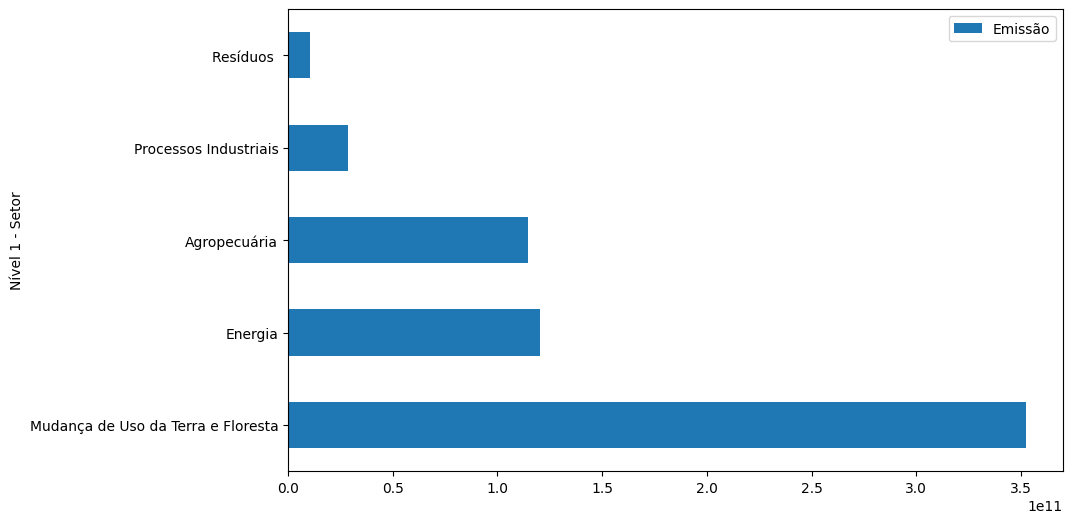

In [43]:
#plotando
emissoes_p_nivel.plot(kind = 'barh', figsize = (10,6));

### Emissão de gases por setor

Agora vamos em busca de duas informações:

- Descobrir quais são os setores mais poluentes para cada gás;
- Descobrir quais são os gases mais poluentes para cada setor.

In [44]:
#Agrupando pelas colunas Gás e Setor e retornando uma funçãço de grupo (max emissão)
gas_por_setor = emissoes_p_ano.groupby(['Gás','Nível 1 - Setor'])[['Emissão']].sum()
gas_por_setor

Emissão
Gás      Nível 1 - Setor                                 
C2F6 (t) Processos Industriais               5.765018e+02
CF4 (t)  Processos Industriais               7.135481e+03
CH4 (t)  Agropecuária                        5.928481e+08
         Energia                             3.429034e+07
         Mudança de Uso da Terra e Floresta  8.662166e+07
...                                                   ...
N2O (t)  Resíduos                            2.764127e+05
NOx (t)  Agropecuária                        2.602719e+06
         Energia                             9.361215e+07
         Processos Industriais               3.546360e+06
SF6 (t)  Processos Industriais               4.705800e+02

[72 rows x 1 columns]

Para descobrir o setor que emite a maior quantidade de CO2, podemos realizar uma seleção específica do gás CO2 com o uso do método *cross-section* [`xs()`](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.xs.html), extraindo a partir disso o valor máximo e índice máximo com os métodos [`max()`](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.max.html) e [`idxmax()`](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.idxmax.html?highlight=idxmax#pandas.DataFrame.idxmax).

In [45]:
#Selecionando os registos agrupados pelo gás (level 0 identifica o indice da coluna onde o CO2 (t) está)
gas_por_setor.xs('CO2 (t)', level = 0)

,Emissão
Nível 1 - Setor,
Agropecuária,5.411750e+08
Energia,1.261352e+10
Mudança de Uso da Terra e Floresta,3.733930e+10
Processos Industriais,2.729603e+09
Resíduos,2.276264e+07


In [46]:
#Selecionando os registos agrupados pelo gás e pelo setor especificamente (é necessário a utilização de uma tupla quando o agrupamento tem mais de um valor passado e uma lista para identificar a coluna dos valores respectivamente)

gas_por_setor.xs(('CO2 (t)','Mudança de Uso da Terra e Floresta'), level = [0,1])

,,Emissão
Gás,Nível 1 - Setor,
CO2 (t),Mudança de Uso da Terra e Floresta,3.733930e+10


In [47]:
#Selecionando o valor máximo relacionado ao gás
#gas_por_setor.xs('CO2 (t)', level = 0)[['Emissão']].max()
gas_por_setor.xs('CO2 (t)', level = 0).max()

#pode ser das duas formas, não é obrigatório pois só possui uma coluna numerica nesse dataset

Emissão    3.733930e+10
dtype: float64

In [48]:
#Selecionando o indice que possui o valor máximo
gas_por_setor.xs('CO2 (t)', level = 0).idxmax()

Emissão    Mudança de Uso da Terra e Floresta
dtype: object

é possivel realizar consultas e seleções utilizando o .loc no lugas do xs, porem quando utilizado o .loc é obrigatorio seguir a hierarquia, ou seja,
informar o nivel 0 até o desejado

nesse caso: gas_por_setor.xs(('CO2 (t)','Mudança de Uso da Terra e Floresta'), level = [0,1])

ficaria assim: gas_por_setor.loc[('CO2 (t)','Mudança de Uso da Terra e Floresta')]

Para selecionar somente o nivel 1 e exibir todos do nivel 0 teria que especificar um a um no iloc, enqt no xs é necessário somente especificar o level 1

Para evitar uma forma manual para cada tipo de gás, podemos explorar ainda mais o método `groupby()` em conjunto com o [`idxmax()`](https://pandas.pydata.org/docs/reference/api/pandas.core.groupby.DataFrameGroupBy.idxmax.html?highlight=idxmax#pandas.core.groupby.DataFrameGroupBy.idxmax).

In [49]:
#Selecionando o indice que possui o valor máximo por gas
gas_por_setor.groupby(level = 0).idxmax()

,Emissão
Gás,
C2F6 (t),"(C2F6 (t), Processos Industriais)"
CF4 (t),"(CF4 (t), Processos Industriais)"
CH4 (t),"(CH4 (t), Agropecuária)"
CO (t),"(CO (t), Energia)"
CO2 (t),"(CO2 (t), Mudança de Uso da Terra e Floresta)"
CO2e (t) GTP-AR2,"(CO2e (t) GTP-AR2, Mudança de Uso da Terra e F..."
CO2e (t) GTP-AR4,"(CO2e (t) GTP-AR4, Mudança de Uso da Terra e F..."
CO2e (t) GTP-AR5,"(CO2e (t) GTP-AR5, Mudança de Uso da Terra e F..."
CO2e (t) GTP-AR6,"(CO2e (t) GTP-AR6, Mudança de Uso da Terra e F..."


Por fim, podemos criar uma tabela sumarizada com as informações dos valores máximos de emissão para cada tipo de gás e com a referência do setor com maior emissão de cada gás.

In [50]:
#Selecionando o valor máximo por gas
gas_por_setor.groupby(level = 0).max()

,Emissão
Gás,
C2F6 (t),5.765018e+02
CF4 (t),7.135481e+03
CH4 (t),5.928481e+08
CO (t),3.959769e+08
CO2 (t),3.733930e+10
CO2e (t) GTP-AR2,3.850044e+10
CO2e (t) GTP-AR4,3.850044e+10
CO2e (t) GTP-AR5,3.831675e+10
CO2e (t) GTP-AR6,3.843359e+10


In [51]:
#Atribuindo a um dataframe os valores da consulta acima
valores_tabela_sumarizada = gas_por_setor.groupby(level = 0).max().values

In [52]:
#Criando uma tabela (dataframe) com o indice e valor máximo de emissão por gás
tabela_sumarizada = gas_por_setor.groupby(level = 0).idxmax()
tabela_sumarizada.insert(1,'Quantidade de emissão',valores_tabela_sumarizada)
tabela_sumarizada

#Obs: nesta consulta gas_por_setor.groupby(level = 0).idxmax() os gáses se tornaram o index, logo a coluna emissão se tornou a coluna copm o indice 0 e os valores estão sendo inseridos na coluna indice 1

,Emissão,Quantidade de emissão
Gás,,
C2F6 (t),"(C2F6 (t), Processos Industriais)",5.765018e+02
CF4 (t),"(CF4 (t), Processos Industriais)",7.135481e+03
CH4 (t),"(CH4 (t), Agropecuária)",5.928481e+08
CO (t),"(CO (t), Energia)",3.959769e+08
CO2 (t),"(CO2 (t), Mudança de Uso da Terra e Floresta)",3.733930e+10
CO2e (t) GTP-AR2,"(CO2e (t) GTP-AR2, Mudança de Uso da Terra e F...",3.850044e+10
CO2e (t) GTP-AR4,"(CO2e (t) GTP-AR4, Mudança de Uso da Terra e F...",3.850044e+10
CO2e (t) GTP-AR5,"(CO2e (t) GTP-AR5, Mudança de Uso da Terra e F...",3.831675e+10
CO2e (t) GTP-AR6,"(CO2e (t) GTP-AR6, Mudança de Uso da Terra e F...",3.843359e+10


Podemos alterar a ordem dos níveis de índice para encontrar a outra informação, que nos diz qual o gás mais emitido para cada tipo de setor. Para isso, vamos utilizar o método [`swaplevel()`](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.swaplevel.html).

In [53]:
#Alterando nivel de hierarquia transformando a consulta em 'setor por gás'
gas_por_setor.swaplevel(0,1)

Emissão
Nível 1 - Setor                    Gás                   
Processos Industriais              C2F6 (t)  5.765018e+02
                                   CF4 (t)   7.135481e+03
Agropecuária                       CH4 (t)   5.928481e+08
Energia                            CH4 (t)   3.429034e+07
Mudança de Uso da Terra e Floresta CH4 (t)   8.662166e+07
...                                                   ...
Resíduos                           N2O (t)   2.764127e+05
Agropecuária                       NOx (t)   2.602719e+06
Energia                            NOx (t)   9.361215e+07
Processos Industriais              NOx (t)   3.546360e+06
                                   SF6 (t)   4.705800e+02

[72 rows x 1 columns]

In [54]:
#selecionando o gaz com maior emissão por setor
gas_por_setor.swaplevel(0,1).groupby(level = 0).idxmax()

,Emissão
Nível 1 - Setor,
Agropecuária,"(Agropecuária, CO2e (t) GWP-AR5)"
Energia,"(Energia, CO2e (t) GWP-AR6)"
Mudança de Uso da Terra e Floresta,"(Mudança de Uso da Terra e Floresta, CO2e (t) ..."
Processos Industriais,"(Processos Industriais, CO2e (t) GWP-AR6)"
Resíduos,"(Resíduos , CO2e (t) GWP-AR5)"


### Emissão ao longo dos anos

Vamos identificar se as emissões de gases estufas aumentaram ou diminuíram ao longo dos anos e visualizar essa variação para cada tipo de gás emitido separadamente.

In [55]:
emissoes_p_ano

,Nível 1 - Setor,Nível 2,Nível 3,Nível 4,Nível 5,Nível 6,Emissão / Remoção / Bunker,Gás,Estado,Atividade Econômica,Produto,Ano,Emissão
0,Processos Industriais,Indústria Química,Produção de ABS,NaN,NaN,NaN,Emissão,COVNM (t),SP,OUTRA_IND,NaN,1970,0.0
1,Processos Industriais,Indústria Química,Produção de Ácido Adípico,NaN,NaN,NaN,Emissão,N2O (t),SP,OUTRA_IND,NaN,1970,6210.0
2,Processos Industriais,Indústria Química,Produção de Ácido Adípico,NaN,NaN,NaN,Emissão,CO (t),SP,OUTRA_IND,NaN,1970,368.0
3,Processos Industriais,Indústria Química,Produção de Ácido Adípico,NaN,NaN,NaN,Emissão,NOx (t),SP,OUTRA_IND,NaN,1970,115.0
4,Processos Industriais,Indústria Química,Produção de Ácido Adípico,NaN,NaN,NaN,Emissão,CO2e (t) GWP-AR2,SP,OUTRA_IND,NaN,1970,1925100.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4926891,Mudança de Uso da Terra e Floresta,Resíduos Florestais,Pantanal,NaN,Desmatamento,NaN,Emissão,CO2e (t) GWP-AR5,MS,AGROPEC,NaN,2021,1004191.0
4926892,Mudança de Uso da Terra e Floresta,Resíduos Florestais,Pantanal,NaN,Desmatamento,NaN,Emissão,CO2e (t) GWP-AR6,MT,AGROPEC,NaN,2021,443120.0
4926893,Mudança de Uso da Terra e Floresta,Resíduos Florestais,Pantanal,NaN,Desmatamento,NaN,Emissão,CO2e (t) GWP-AR6,MS,AGROPEC,NaN,2021,1009968.0
4926894,Mudança de Uso da Terra e Floresta,Resíduos Florestais,Pantanal,NaN,Desmatamento,NaN,Emissão,N2O (t),MT,AGROPEC,NaN,2021,479.0


In [56]:
#Agrupando por ano e selecionando função de grupo (media da emissao)
emissoes_p_ano.groupby('Ano')[['Emissão']].mean()

,Emissão
Ano,
1970,22127.818644
1971,23651.134813
1972,25177.219717
1973,27475.521366
1974,29196.398182
1975,31402.034191
1976,33663.406050
1977,34539.487677
1978,35947.683695


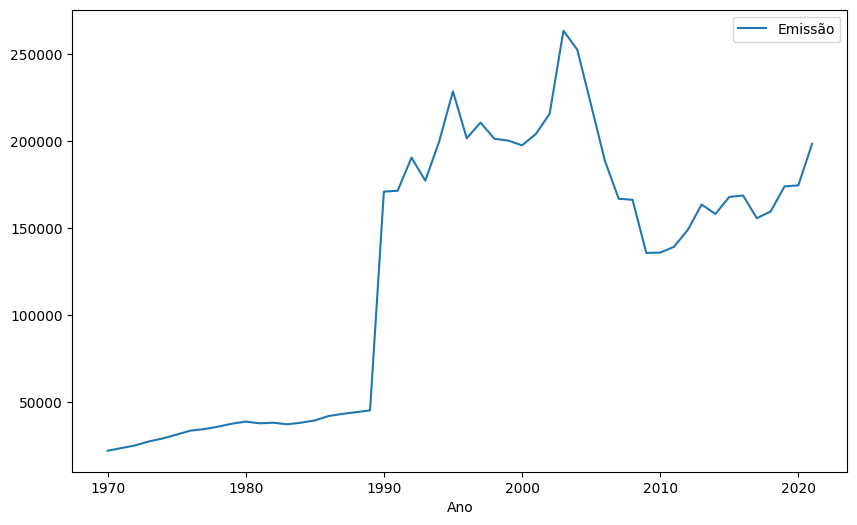

In [57]:
#Plotando media de emissão por ano
emissoes_p_ano.groupby('Ano')[['Emissão']].mean().plot(figsize = (10,6));

In [58]:
#selecionando qual ano teve a maior media
emissoes_p_ano.groupby('Ano')[['Emissão']].mean().idxmax()

Emissão    2003
dtype: int64

In [59]:
#agrupando por ano e por gáe selecionando a media
emissoes_p_ano.groupby(['Ano','Gás'])[['Emissão']].mean()

Emissão
Ano  Gás                     
1970 C2F6 (t)        0.232610
     CF4 (t)         3.557421
     CH4 (t)      1471.024024
     CO (t)       2155.556658
     CO2 (t)     19244.913199
...                       ...
2021 HFC-23 (t)      0.000000
     HFC-32 (t)    261.100000
     N2O (t)       119.295311
     NOx (t)       679.395431
     SF6 (t)         5.240000

[1196 rows x 1 columns]

In [60]:
#criando dataframe para armazenar as infromações e transformando ano em coluna e adicionando index de 0 a ...
media_emissao_anual = emissoes_p_ano.groupby(['Ano','Gás'])[['Emissão']].mean().reset_index()
media_emissao_anual

,Ano,Gás,Emissão
0,1970,C2F6 (t),0.232610
1,1970,CF4 (t),3.557421
2,1970,CH4 (t),1471.024024
3,1970,CO (t),2155.556658
4,1970,CO2 (t),19244.913199
...,...,...,...
1191,2021,HFC-23 (t),0.000000
1192,2021,HFC-32 (t),261.100000
1193,2021,N2O (t),119.295311
1194,2021,NOx (t),679.395431


In [61]:
#Tranformando os gases em colunas (wide e long)
media_emissao_anual = media_emissao_anual.pivot_table(index = 'Ano', columns = 'Gás', values = 'Emissão')
media_emissao_anual

Gás,C2F6 (t),CF4 (t),CH4 (t),CO (t),CO2 (t),CO2e (t) GTP-AR2,CO2e (t) GTP-AR4,CO2e (t) GTP-AR5,CO2e (t) GTP-AR6,CO2e (t) GWP-AR2,...,COVNM (t),HFC-125 (t),HFC-134a (t),HFC-143a (t),HFC-152a (t),HFC-23 (t),HFC-32 (t),N2O (t),NOx (t),SF6 (t)
Ano,,,,,,,,,,,,,,,,,,,,,
1970,0.232610,3.557421,1471.024024,2155.556658,19244.913199,20821.379814,20821.379814,19162.726020,19775.283385,35396.183865,...,742.074863,0.000000,0.000000,0.000000,0.0,0.00,0.00,31.632709,154.072797,0.000
1971,0.334611,5.117360,1525.506914,2259.625805,21598.587743,22466.288595,22466.288595,20748.481445,21386.175802,37570.982886,...,730.119047,0.000000,0.000000,0.000000,0.0,0.00,0.00,32.609237,170.550178,0.000
1972,0.404684,6.189025,1584.719568,2418.944795,23664.445521,24100.305265,24100.305265,22303.224240,22966.797327,39800.768350,...,774.278817,0.000000,0.000000,0.000000,0.0,0.00,0.00,34.311864,188.856161,0.000
1973,0.463147,7.083136,1642.612439,2596.053853,27726.668829,26683.827206,26683.827206,24827.077028,25516.409611,42947.755490,...,796.866394,0.000000,0.000000,0.000000,0.0,0.00,0.00,35.278689,217.320480,0.000
1974,0.471026,7.203619,1704.614365,2681.450599,30155.918952,28539.318732,28539.318732,26600.481407,27321.124852,45431.240064,...,1024.694923,0.000000,0.000000,0.000000,0.0,0.00,0.00,37.098183,247.521415,0.000
1975,0.502952,7.691893,1854.360821,2730.894830,32292.965771,30593.767465,30593.767465,28507.669059,29285.642221,48944.729581,...,1065.682750,0.000000,0.000000,0.000000,0.0,0.00,0.00,39.451008,262.716346,0.000
1976,0.577172,8.826970,1932.641716,2702.494362,35640.344723,33066.878007,33066.878007,30879.481709,31693.226162,52203.028009,...,1091.778909,0.000000,0.000000,0.000000,0.0,0.00,0.00,41.583225,287.013048,0.000
1977,0.692855,10.596169,1931.897645,2675.992077,37313.909077,34182.312333,34182.312333,31967.243034,32784.131397,53333.605735,...,1147.712448,0.000000,0.000000,0.000000,0.0,0.00,0.00,42.571086,292.405821,0.000
1978,0.749660,11.464915,1921.281930,2755.891877,40669.820049,35969.633601,35969.633601,33762.778999,34580.720998,55015.291182,...,1289.853564,0.000000,0.000000,0.000000,0.0,0.00,0.00,42.426649,322.982906,0.000


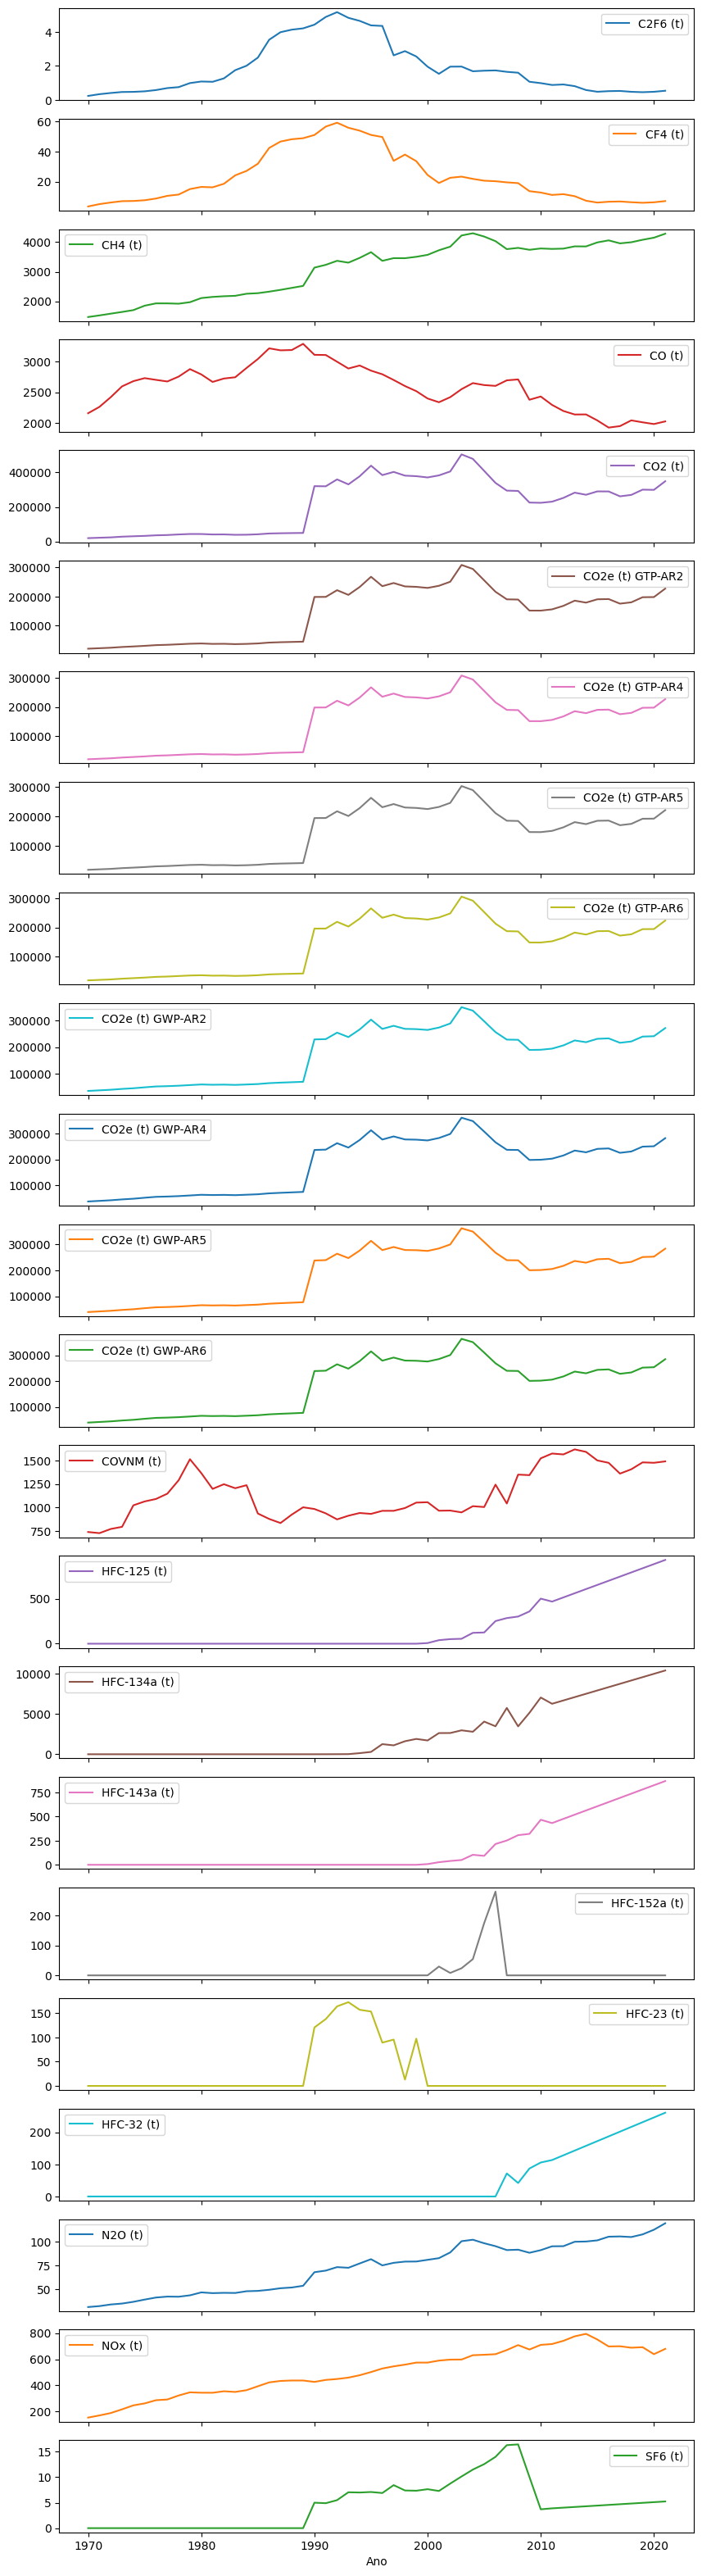

In [62]:
#plotando media anual por gas
media_emissao_anual.plot(subplots = True, figsize = (10,40));

Desafio 3


In [63]:
#agrupando por ano e por setor e selecionando a média (reset index para criar novo index e a coluna ano se tornar uma coluna)
media_emissao_anual_desafio = emissoes_p_ano.groupby(['Ano','Nível 1 - Setor'])[['Emissão']].mean().reset_index()
media_emissao_anual_desafio

,Ano,Nível 1 - Setor,Emissão
0,1970,Agropecuária,49292.425313
1,1970,Energia,15939.703116
2,1970,Mudança de Uso da Terra e Floresta,0.000000
3,1970,Processos Industriais,106549.168676
4,1970,Resíduos,11684.883558
...,...,...,...
255,2021,Agropecuária,149793.768835
256,2021,Energia,72928.637234
257,2021,Mudança de Uso da Terra e Floresta,690085.511209
258,2021,Processos Industriais,787101.255789


In [64]:
#Tranformando os setores em colunas (wide e long)
media_emissao_anual_desafio = media_emissao_anual_desafio.pivot_table(index = 'Ano', columns = 'Nível 1 - Setor', values = 'Emissão')
media_emissao_anual_desafio

Nível 1 - Setor,Agropecuária,Energia,Mudança de Uso da Terra e Floresta,Processos Industriais,Resíduos
Ano,,,,,
1970,49292.425313,15939.703116,0.000000e+00,106549.168676,11684.883558
1971,51199.559433,17698.989894,0.000000e+00,111532.507753,12676.706849
1972,53508.935498,19092.876761,0.000000e+00,125701.525455,13709.697850
1973,55494.006224,22062.085929,0.000000e+00,137657.110402,14715.248028
1974,57896.513900,23810.659474,0.000000e+00,149941.779638,15710.616150
1975,63303.098508,25036.433686,0.000000e+00,168471.860169,16667.446706
1976,66347.533521,27214.281091,0.000000e+00,193826.482068,17539.505222
1977,66977.413505,27645.258640,0.000000e+00,231505.609283,18462.455148
1978,66640.432009,29734.461056,0.000000e+00,255736.210711,19327.840165


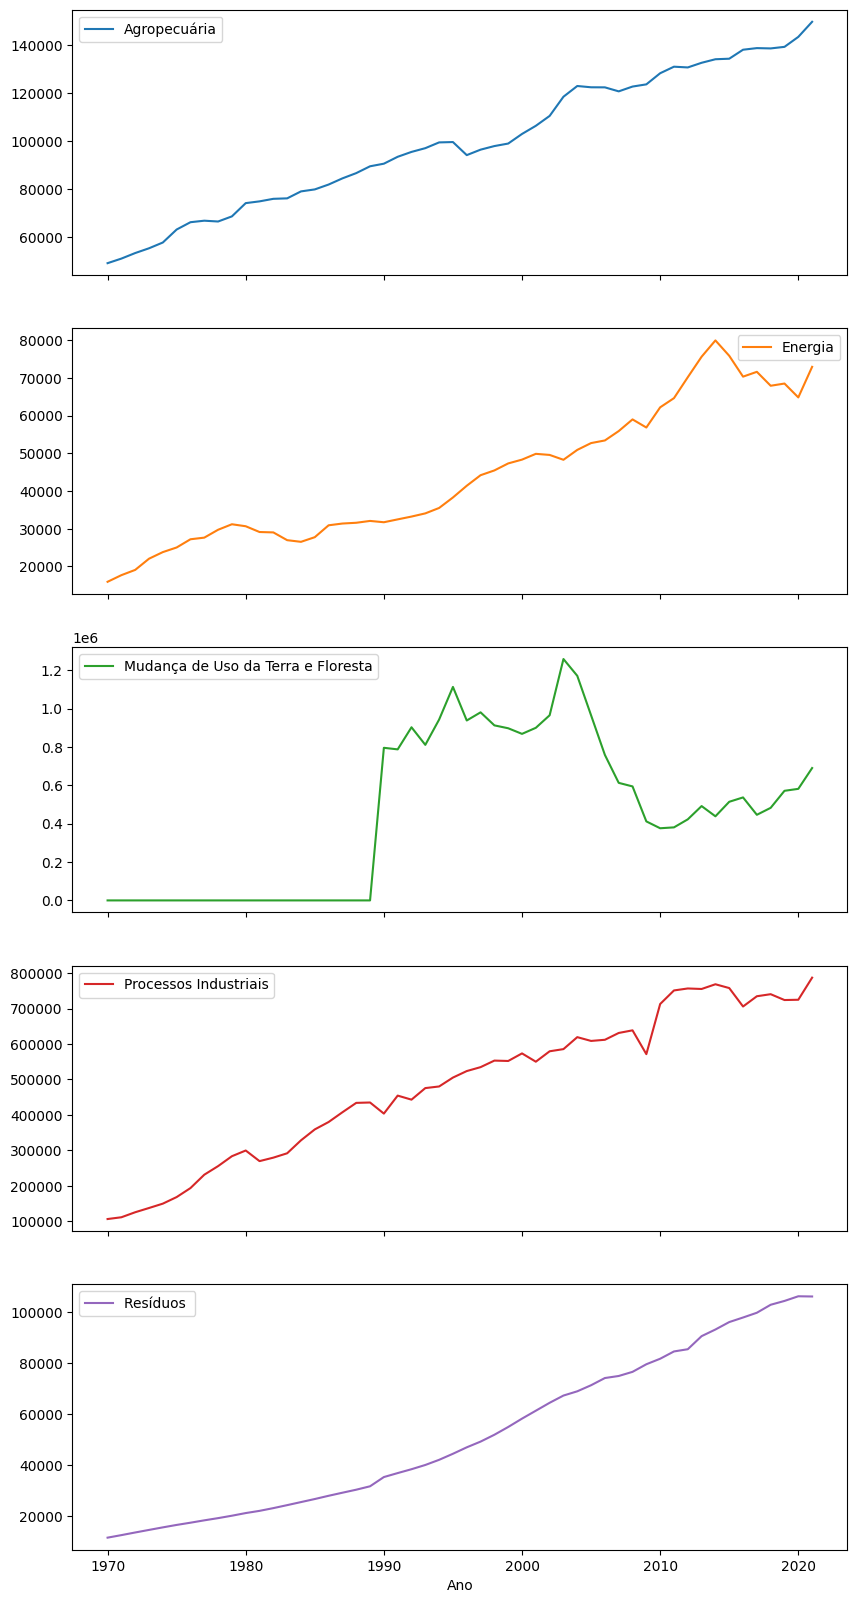

In [65]:
#plotando media anual por setor
media_emissao_anual_desafio.plot(subplots = True, figsize = (10,20));

In [66]:
#RESOLUÇÃO PASSADA
emissao_setores = emissoes_p_ano.pivot_table(values = 'Emissão', index = 'Ano', columns = 'Nível 1 - Setor', aggfunc = 'mean')
emissao_setores

Nível 1 - Setor,Agropecuária,Energia,Mudança de Uso da Terra e Floresta,Processos Industriais,Resíduos
Ano,,,,,
1970,49292.425313,15939.703116,0.000000e+00,106549.168676,11684.883558
1971,51199.559433,17698.989894,0.000000e+00,111532.507753,12676.706849
1972,53508.935498,19092.876761,0.000000e+00,125701.525455,13709.697850
1973,55494.006224,22062.085929,0.000000e+00,137657.110402,14715.248028
1974,57896.513900,23810.659474,0.000000e+00,149941.779638,15710.616150
1975,63303.098508,25036.433686,0.000000e+00,168471.860169,16667.446706
1976,66347.533521,27214.281091,0.000000e+00,193826.482068,17539.505222
1977,66977.413505,27645.258640,0.000000e+00,231505.609283,18462.455148
1978,66640.432009,29734.461056,0.000000e+00,255736.210711,19327.840165


desafio 4

In [67]:
soma_emissoes_por_estado = emissoes_p_ano.groupby(['Estado','Nível 1 - Setor'])[['Emissão']].sum()
soma_emissoes_por_estado

Emissão
Estado Nível 1 - Setor                                 
AC     Agropecuária                        7.270206e+08
       Energia                             2.071751e+08
       Mudança de Uso da Terra e Floresta  7.847879e+09
       Resíduos                            2.928323e+07
AL     Agropecuária                        7.628303e+08
...                                                 ...
TO     Agropecuária                        2.762475e+09
       Energia                             5.130379e+08
       Mudança de Uso da Terra e Floresta  9.435591e+09
       Processos Industriais               2.613905e+07
       Resíduos                            6.177003e+07

[132 rows x 1 columns]

In [68]:
soma_emissoes_por_estado.xs('Energia', level = 1)

,Emissão
Estado,
AC,2.071751e+08
AL,5.958697e+08
AM,1.916462e+09
AP,2.638059e+08
BA,4.801368e+09
CE,1.879584e+09
DF,9.487860e+08
ES,2.201326e+09
GO,2.761709e+09


In [69]:
soma_emissoes_por_estado.xs('MG', level = 0).idxmax()

Emissão    Agropecuária
dtype: object

In [70]:
emissoes_estados_setor = emissoes_p_ano.groupby(['Estado', 'Nível 1 - Setor'])[['Emissão']].sum()
emissoes_estados_setor.groupby(level = 0).idxmax()

,Emissão
Estado,
AC,"(AC, Mudança de Uso da Terra e Floresta)"
AL,"(AL, Agropecuária)"
AM,"(AM, Mudança de Uso da Terra e Floresta)"
AP,"(AP, Mudança de Uso da Terra e Floresta)"
BA,"(BA, Mudança de Uso da Terra e Floresta)"
CE,"(CE, Energia)"
DF,"(DF, Energia)"
ES,"(ES, Processos Industriais)"
GO,"(GO, Agropecuária)"


In [71]:
emissoes_estados_setor.swaplevel(0,1).groupby(level = 0).idxmax()

,Emissão
Nível 1 - Setor,
Agropecuária,"(Agropecuária, MG)"
Energia,"(Energia, SP)"
Mudança de Uso da Terra e Floresta,"(Mudança de Uso da Terra e Floresta, PA)"
Processos Industriais,"(Processos Industriais, MG)"
Resíduos,"(Resíduos , SP)"


### População dos estados

Vamos realizar a importação de uma nova base de dados com a informação da população de cada estado do Brasil, para posteriormente encontrarmos a emissão per capita de cada estado.

ℹ
Os dados foram obtidos através do [censo do IBGE](https://www.ibge.gov.br/estatisticas/sociais/saude/22827-censo-demografico-2022.html?=&t=resultados)

In [72]:
#Criando dataframe utilizando a planilha, iniciando a partir da linha indice 1(segunda linha) e ignorando as ultimas 34 linhas
populacao_estados = pd.read_excel('/content/drive/MyDrive/Dados Python Estudos/POP2022_Municipios.xls', header = 1, skipfooter = 34)
populacao_estados

,UF,COD. UF,COD. MUNIC,NOME DO MUNICÍPIO,POPULAÇÃO
0,RO,11,15,Alta Floresta D'Oeste,21558
1,RO,11,23,Ariquemes,100896
2,RO,11,31,Cabixi,5107
3,RO,11,49,Cacoal,92202
4,RO,11,56,Cerejeiras,15237
...,...,...,...,...,...
5565,GO,52,22005,Vianópolis,14046
5566,GO,52,22054,Vicentinópolis,8776
5567,GO,52,22203,Vila Boa,3686
5568,GO,52,22302,Vila Propício,5646


Como as informações são referentes aos municípios, vamos realizar uma agregação com base na coluna estado.

In [73]:
#somando valores numericos do dataframe agrupados por UF
populacao_estados.groupby('UF').sum(numeric_only = True)

,COD. UF,COD. MUNIC
UF,,
AC,264,7719
AL,2754,487914
AM,806,134451
AP,256,5908
BA,12093,7151757
CE,4232,1295156
DF,53,108
ES,2496,226710
GO,12792,2788737


Percebemos que a informação da população não foi agregada, portanto será necessário algum tratamento nessa coluna para retornar devidamente os dados.

In [74]:
#alterando tipo de dado da coluna população
populacao_estados['POPULAÇÃO'].astype(int)

ValueError: ignored

In [75]:
#selecionando linhas que contem algum (  na coluna população
populacao_estados[populacao_estados['POPULAÇÃO'].str.contains('\(', na = False)]

,UF,COD. UF,COD. MUNIC,NOME DO MUNICÍPIO,POPULAÇÃO
16,RO,11,205,Porto Velho,461.748(1)
74,AM,13,29,Alvarães,15.916(2)
81,AM,13,409,Barcelos,18.399(3)
83,AM,13,607,Benjamin Constant,37.436(4)
87,AM,13,805,Borba,33.209(5)
88,AM,13,839,Caapiranga,13.851(6)
97,AM,13,1605,Fonte Boa,27.692(7)
98,AM,13,1654,Guajará,13.809(8)
99,AM,13,1704,Humaitá,59.504(9)
103,AM,13,1951,Itamarati,10.783(10)


In [76]:
#adicionando duas novas colunas, uma sem os parenteses e outra sem o ponto
#Funcao asign utilizada para adicionais mais de uma coluna com base em colunas existentes, regex significa o \d{1,2}\ sendo reconhecido como um numero inteiro com um ou dois digitos e não como uma string
#na segunda coluna criada é utilizada a funcao lambda pois a coluna populacao-sem_parenteses não exixtia ainda, o x é reconhecido como a propria populacao_estados, x.loc[todas as linhas, coluna x]
populacao_estados = populacao_estados.assign(populacao_sem_parenteses = populacao_estados['POPULAÇÃO'].replace('\(\d{1,2}\)','', regex = True),
                                             populacao = lambda x : x.loc[:,'populacao_sem_parenteses'].replace('\.', '', regex = True))
populacao_estados

,UF,COD. UF,COD. MUNIC,NOME DO MUNICÍPIO,POPULAÇÃO,populacao_sem_parenteses,populacao
0,RO,11,15,Alta Floresta D'Oeste,21558,21558,21558
1,RO,11,23,Ariquemes,100896,100896,100896
2,RO,11,31,Cabixi,5107,5107,5107
3,RO,11,49,Cacoal,92202,92202,92202
4,RO,11,56,Cerejeiras,15237,15237,15237
...,...,...,...,...,...,...,...
5565,GO,52,22005,Vianópolis,14046,14046,14046
5566,GO,52,22054,Vicentinópolis,8776,8776,8776
5567,GO,52,22203,Vila Boa,3686,3686,3686
5568,GO,52,22302,Vila Propício,5646,5646,5646


In [77]:
#consultando novamente linhas onde na coluna população possui um (
populacao_estados[populacao_estados['POPULAÇÃO'].str.contains('\(', na = False)]

,UF,COD. UF,COD. MUNIC,NOME DO MUNICÍPIO,POPULAÇÃO,populacao_sem_parenteses,populacao
16,RO,11,205,Porto Velho,461.748(1),461.748,461748
74,AM,13,29,Alvarães,15.916(2),15.916,15916
81,AM,13,409,Barcelos,18.399(3),18.399,18399
83,AM,13,607,Benjamin Constant,37.436(4),37.436,37436
87,AM,13,805,Borba,33.209(5),33.209,33209
88,AM,13,839,Caapiranga,13.851(6),13.851,13851
97,AM,13,1605,Fonte Boa,27.692(7),27.692,27692
98,AM,13,1654,Guajará,13.809(8),13.809,13809
99,AM,13,1704,Humaitá,59.504(9),59.504,59504
103,AM,13,1951,Itamarati,10.783(10),10.783,10783


In [78]:
#transformando dado em int
populacao_estados = populacao_estados.astype({'populacao': 'int64'})

In [79]:
#selecionando soma do campo populacao por uf
populacao_estados = populacao_estados.groupby('UF')[['populacao']].sum()

### Unindo os dados

Com as informações tratadas, podemos realizar a junção dos dados de emissão com a população, com uso do método [`merge()`](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.merge.html).

In [80]:
#atribuindo a uma tabela os dados da soma de emissão por estado onde o ano é 2021
estados_emissao = emissoes_p_ano[emissoes_p_ano['Ano'] == 2021].groupby('Estado')[['Emissão']].sum().reset_index()
estados_emissao

,Estado,Emissão
0,AC,3.505471e+08
1,AL,6.261279e+07
2,AM,1.189649e+09
3,AP,3.568410e+07
4,BA,5.932251e+08
5,CE,2.034731e+08
6,DF,5.668738e+07
7,ES,2.697547e+08
8,GO,6.008081e+08
9,MA,9.476324e+08


In [81]:
#juntando as duas tabelas utilizando estado e uf como comparação (chave)
dados_agrupados = pd.merge(estados_emissao, populacao_estados,left_on = 'Estado', right_on = 'UF')
dados_agrupados

,Estado,Emissão,populacao
0,AC,3.505471e+08,829780
1,AL,6.261279e+07,3125254
2,AM,1.189649e+09,3952262
3,AP,3.568410e+07,774268
4,BA,5.932251e+08,14659023
5,CE,2.034731e+08,8936431
6,DF,5.668738e+07,2923369
7,ES,2.697547e+08,3975100
8,GO,6.008081e+08,6950976
9,MA,9.476324e+08,6800605


Vamos verificar se há algum indício de se a emissão aumenta conforme o tamanho da população.

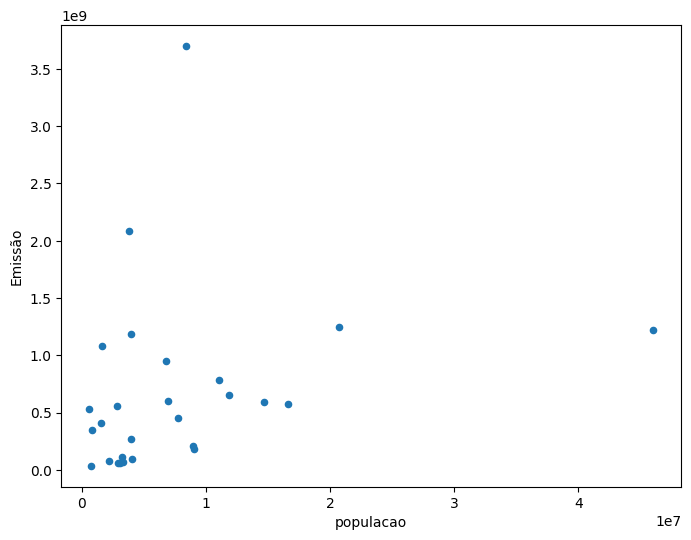

In [82]:
#plotando
dados_agrupados.plot(x = 'populacao', y = 'Emissão', kind = 'scatter', figsize = (8,6));

Se quisermos saber a informação de cada estado nos pontos do gráfico, podemos utilizar uma outra biblioteca para obter um gráfico mais elaborado.

In [83]:
#Importando biblioteca
import plotly.express as px

In [84]:
#visualizando grafico de dispersão (obs: opacity é para não aparecer um ponto igual no grafico acima)
px.scatter(data_frame = dados_agrupados, x= 'populacao', y='Emissão',text= 'Estado',opacity = 0)

Para obtermos a emissão per capita, criaremos uma nova coluna com a divisão dos valores de emissão pela população de cada estado.

In [86]:
#criando nova coluna ordenada decrescentemente
dados_agrupados = dados_agrupados.assign(emissao_per_capita = dados_agrupados['Emissão']/dados_agrupados['populacao']).sort_values('emissao_per_capita', ascending = False)
dados_agrupados

,Estado,Emissão,populacao,emissao_per_capita
21,RR,5.282071e+08,634805,832.077694
20,RO,1.083515e+09,1616379,670.334662
12,MT,2.081610e+09,3784239,550.073647
13,PA,3.701684e+09,8442962,438.434230
0,AC,3.505471e+08,829780,422.457928
2,AM,1.189649e+09,3952262,301.004463
26,TO,4.082159e+08,1584306,257.662300
11,MS,5.551278e+08,2833742,195.899220
9,MA,9.476324e+08,6800605,139.345312
8,GO,6.008081e+08,6950976,86.435075


In [90]:
#visualizando emissao per capita por estado
px.bar(data_frame = dados_agrupados,  x='Estado', y = 'emissao_per_capita')

In [91]:
#novo gráfico de dispersão e adaptando com o tamanho do ponto de acordo com a emissão per capita
px.scatter(data_frame = dados_agrupados, x= 'populacao', y='Emissão',text= 'Estado',size = 'emissao_per_capita')